In [1]:
# Importing Python Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
import plotly.plotly as py
import plotly.figure_factory as ff
import math
from scipy.stats import norm
from scipy import stats
import csv
from seaborn import timeseries
from scipy.stats import spearmanr

In [2]:
# Importing data
df = pd.DataFrame.from_csv('rawdata/data_revised_2.csv', header=0, sep=',', index_col=0)
df.head()

,age,gender,salary,retirement_age,marital_status,state_of_residence,health_risk_score,salary_growth_rate,salary_risk_score,pensions,...,recommended_account11_name,recommended_account11_pre_tax_contrib,recommended_account11_roth_contrib,recommended_account11_post_tax_contrib,recommended_account11_taxable_contrib,recommended_account12_name,recommended_account12_pre_tax_contrib,recommended_account12_roth_contrib,recommended_account12_post_tax_contrib,recommended_account12_taxable_contrib
name,,,,,,,,,,,,,,,,,,,,,
637,60,M,50000,64,True,IL,0.4,0.005,-1.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
639,59,M,235000,66,True,VA,0.8,0.020,-0.5,95000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
662,61,M,120000,65,False,PA,0.4,0.015,-0.5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
663,65,M,300000,65,False,CO,0.4,0.010,-0.5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
669,69,F,96000,67,True,MO,0.0,0.010,-1.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


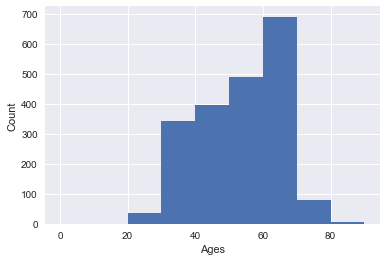

,age
0.2,40.0
0.4,50.0
0.6,59.0
0.8,65.0


In [3]:
#Visualization 1: Unconditional Distribution of investor ages

#histogram
sns.set()
bins=[0,20,30,40,50,60,70,80,90]
plt.hist(df.age, bins=bins)
plt.xlabel("Ages")
plt.ylabel("Count")
plt.show()

#Quantiles
df.iloc[:,[0]].quantile([0.2, 0.4,0.6, 0.8])

In [4]:
#Calculate weights for ages

CountVeryYoung= sum(df.age<=40) 
#print(CountVeryYoung/df.age.count()) #for age 35 weight

WeightYoung = sum((df.age>40) & (df.age<=50))/df.age.count() 
WeightMiddle = sum((df.age>50) & (df.age<=60))/df.age.count() 
WeightOld = sum((df.age>60))/df.age.count() 

#print(WeightYoung) #for age 45 weight
#print(WeightMiddle) #for age 55 weight
#print(WeightOld) #for age 65 weight

print (tabulate([["Very Young Age", CountVeryYoung/df.age.count()], ["Young Age", WeightYoung], 
               ["Middle Age", WeightMiddle], ["Old Age", WeightOld]], 
         headers=['Category', 'Weight']))

Category          Weight
--------------  --------
Very Young Age  0.200392
Young Age       0.202842
Middle Age      0.247428
Old Age         0.349339


In [5]:
#Visualization 2: Distribution of age difference for married investors
ageMarriedInvestor = df.age[df.marital_status == True]
spouseAgeMarriedInvestor = df.spouse_age[df.marital_status == True]
diff = ageMarriedInvestor - spouseAgeMarriedInvestor

#histogram
sns.set()
bins = [-40, -30, -20,-10,0,10,20,30, 40]
plt.hist(diff, bins=bins)

#calculate standard deviation

#Quantiles
diff.quantile([0.25, 0.5, 0.75, 0.95])

0.25   -3.0
0.50    0.0
0.75    2.0
0.95    8.0
dtype: float64

In [6]:
#Calculate weights for investors who are married with same age and different age spouse
CountMarried = sum(df.marital_status==True)
WeightSameAgeSpouse = sum((df.marital_status==True) & ((df.spouse_age - df.age <=2) & (df.spouse_age - df.age >=-2)))/CountMarried
#print(WeightSameAgeSpouse) #same age

WeightOlderSpouse = sum((df.marital_status==True) & ((df.spouse_age - df.age > 2) & (df.spouse_age - df.age <=10)))/CountMarried
#print(WeightOlderSpouse) #Spouse age - investor age = 5

WeightMuchOlderSpouse = sum((df.marital_status==True) & (df.spouse_age - df.age > 10))/CountMarried
#print(WeightMuchOlderSpouse) #Spouse age - investor age = 15

WeightYoungerSpouse = sum((df.marital_status==True) & ((df.spouse_age - df.age <-2) & (df.spouse_age - df.age >=-10)))/CountMarried
#print(WeightYoungerSpouse) #Investor age - spouse age = 5

WeightMuchYoungerSpouse = sum((df.marital_status==True) & (df.spouse_age - df.age <-10) )/CountMarried
#print(WeightMuchYoungerSpouse) #Investor age - spouse age = 15

print (tabulate([["Same Age Spouse", WeightSameAgeSpouse], ["Older Spouse", WeightOlderSpouse], 
               ["Much Older Spouse", WeightMuchOlderSpouse], ["Younger Spouse", WeightYoungerSpouse],
                 ["Much Younger Spouse", WeightMuchYoungerSpouse ]], 
         headers=['Category', 'Weight']))

Category                Weight
-------------------  ---------
Same Age Spouse      0.52338
Older Spouse         0.224774
Much Older Spouse    0.0336341
Younger Spouse       0.198523
Much Younger Spouse  0.0196883


In [7]:
#Visualization 3: single vs married investors

countMarried = sum(df.marital_status==True)
countMarried

countSingle = sum(df.marital_status==False)
countSingle

#histogram
sns.set()
plt.hist(df.iloc[:,[4]], bins=2)

print (tabulate([["Single", countSingle], ["Married", countMarried]], 
         headers=['Marital Status', 'Count']))



Marital Status      Count
----------------  -------
Single                822
Married              1219


In [8]:
# Weight calculation for single vs. married investors

print (tabulate([["Single Weight", (countSingle)/(countSingle + countMarried)], ["Married", (countMarried)/(countSingle + countMarried)]], 
         headers=['Marital Status', 'Weight']))

Marital Status      Weight
----------------  --------
Single Weight     0.402744
Married           0.597256


In [9]:
# Visualization 4: Distribution of sex, conditional on marital status (2 possible values for single – f, m; 3 for married – f/f/, f/m, m/m)

singleM = df[(df['marital_status']==False) & (df.gender=='M')]
singleF = df[(df['marital_status']==False) & (df.gender=='F')]
singleTot = df[(df['marital_status']==False)]

MM = df[(df['marital_status']==True) & (df.gender=='M') & (df.spouse_gender=='M')]
MF = df[(df['marital_status']==True) & (df.gender=='M') & (df.spouse_gender=='F')]
FF = df[(df['marital_status']==True) & (df.gender=='F') & (df.spouse_gender=='F')]
FM = df[(df['marital_status']==True) & (df.gender=='F') & (df.spouse_gender=='M')]

print (tabulate([["Male", singleM.shape[0], MM.shape[0], MF.shape[0]], 
                ["Female", singleF.shape[0], FM.shape[0], FF.shape[0]],
                ["Total", singleTot.shape[0], "708", "501"]],
                  headers=['Investor Gender', 'Single', 'Male Spouse', 'Female Spouse']))


Investor Gender      Single    Male Spouse    Female Spouse
-----------------  --------  -------------  ---------------
Male                    262              9              487
Female                  558            699               14
Total                   822            708              501


Health Risk      Count
-------------  -------
Poor                32
Below Average       82
Average            669
Above Average      755
Excellent          483


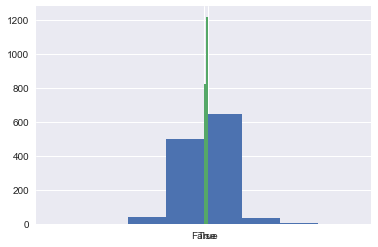

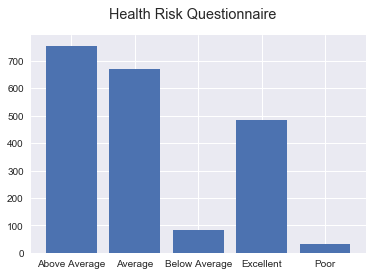

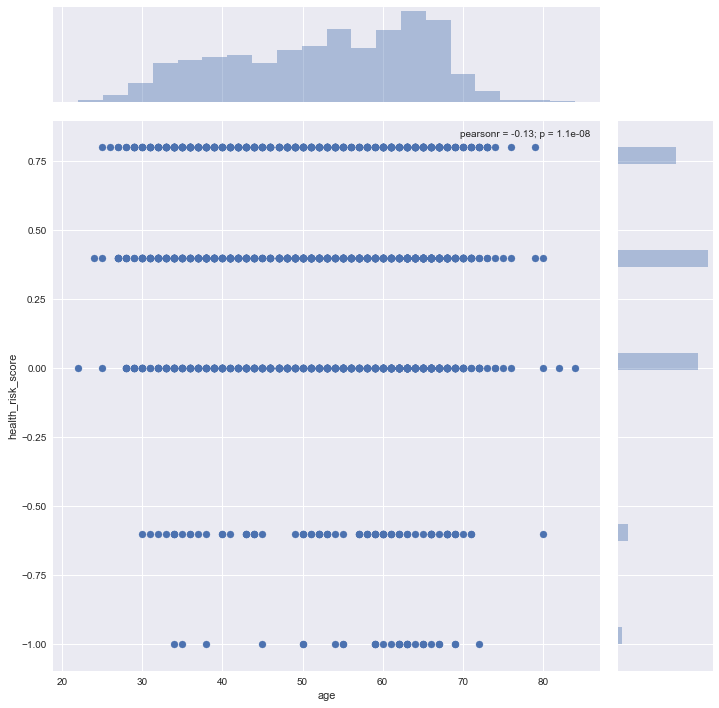

In [10]:
#Visualization 5: Distribution of Health Risk Questionnaire Responses
hs = df.health_risk_score.to_frame()

# removing NaN's
cleanhs = hs[np.isfinite(hs['health_risk_score'])]


Poordf = df.iloc[:,[6]]==-1.0
Poor = Poordf[Poordf.health_risk_score==True]

BelowAveragedf = df.iloc[:,[6]]==-0.6
BelowAverage = BelowAveragedf[BelowAveragedf.health_risk_score==True]

Averagedf = df.iloc[:,[6]]==0.0
Average = Averagedf[Averagedf.health_risk_score==True]

AboveAveragedf = df.iloc[:,[6]]==0.4
AboveAverage = AboveAveragedf[AboveAveragedf.health_risk_score==True]

Excellentdf = df.iloc[:,[6]]==0.8
Excellent = Excellentdf[Excellentdf.health_risk_score==True]


data = {'Poor': Poor.shape[0], 'Below Average': BelowAverage.shape[0], 
        'Average': Average.shape[0], 'Above Average': AboveAverage.shape[0],
        'Excellent': Excellent.shape[0]}
names = list(data.keys())
values = list(data.values())
fig, ax = plt.subplots()
ax.bar(names, values)
fig.suptitle('Health Risk Questionnaire')


print (tabulate([["Poor", Poor.shape[0]], ["Below Average", BelowAverage.shape[0]], 
               ["Average", Average.shape[0]], ["Above Average", AboveAverage.shape[0]],
               ["Excellent", Excellent.shape[0]]], 
         headers=['Health Risk', 'Count']))



# how does health score relate to age group?
healthCorr = df.iloc[:,[0, 6]]
sns.jointplot(x="age", y = "health_risk_score", data=healthCorr, size=10)
plt.show()
## per age group

# can we plot the hist in a non-alphabetical order?

Salary Risk                    Count
---------------------------  -------
Very Unlikely                   1186
Unlikely                         386
Neither Unlikely nor Likely      252
Likely                           153
Very Likely                       44


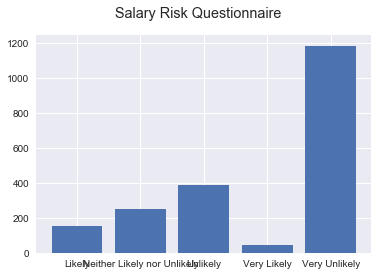

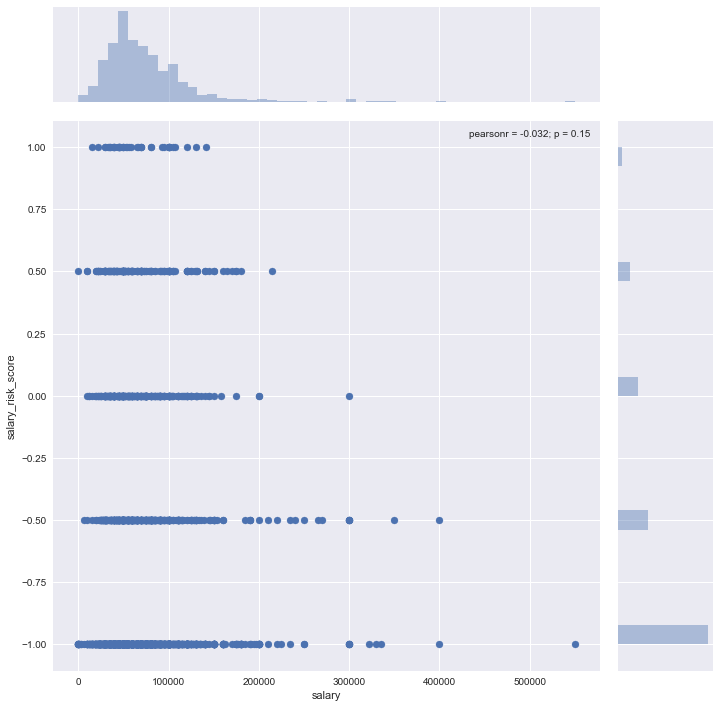

In [11]:
#Visualization 6: Distribution of Salary Risk Questionnaire Responses

salaryRisk = df.iloc[:,[8]]

# removing NaN's
cleanSalaryRisk = salaryRisk[np.isfinite(salaryRisk['salary_risk_score'])]
pd.unique(cleanSalaryRisk['salary_risk_score'])


VeryUnlikelydf = df.iloc[:,[8]]==-1.0
VeryUnlikely = VeryUnlikelydf[VeryUnlikelydf.salary_risk_score==True]

Unlikelydf = df.iloc[:,[8]]==-0.5
Unlikely = Unlikelydf[Unlikelydf.salary_risk_score==True]

Neutraldf = df.iloc[:,[8]]==0.0
Neutral = Neutraldf[Neutraldf.salary_risk_score==True]

Likelydf = df.iloc[:,[8]]==0.5
Likely = Likelydf[Likelydf.salary_risk_score==True]

VeryLikelydf = df.iloc[:,[8]]==1.0
VeryLikely = VeryLikelydf[VeryLikelydf.salary_risk_score==True]


data = {'Very Unlikely': VeryUnlikely.shape[0], 'Unlikely': Unlikely.shape[0], 
        'Neither Likely nor Unlikely': Neutral.shape[0], 'Likely': Likely.shape[0],
        'Very Likely': VeryLikely.shape[0]}
names = list(data.keys())
values = list(data.values())
fig, ax = plt.subplots()
ax.bar(names, values)
fig.suptitle('Salary Risk Questionnaire')


print (tabulate([["Very Unlikely", VeryUnlikely.shape[0]], ["Unlikely", Unlikely.shape[0]], 
               ["Neither Unlikely nor Likely", Neutral.shape[0]], ["Likely", Likely.shape[0]],
               ["Very Likely", VeryLikely.shape[0]]], 
         headers=['Salary Risk', 'Count']))


#How does salary correlate to salary risk?
salaryCorr = df.iloc[:,[2, 8]]
sns.jointplot(x="salary", y = "salary_risk_score", data=salaryCorr, size=10)
plt.show()
# non-alphabetize responses

In [12]:
#Weights Calculation for Salary Risk Questionnaire Responses by Very Young Age 
salaryAndAge = df.iloc[:,[0, 8]]
#sns.jointplot(x="age", y = "salary_risk_score", data=salaryAndAge, size=10)
#plt.show()

WeightVeryYoungVeryLowSalaryRisk = sum((salaryAndAge.age<=40) & (salaryAndAge.salary_risk_score == -1.0))/CountVeryYoung
#print(WeightVeryYoungVeryLowSalaryRisk)

WeightVeryYoungLowSalaryRisk = sum((salaryAndAge.age<=40) & (salaryAndAge.salary_risk_score == -0.5))/CountVeryYoung
#print(WeightVeryYoungLowSalaryRisk)

WeightVeryYoungAvgSalaryRisk = sum((salaryAndAge.age<=40) & (salaryAndAge.salary_risk_score == 0.0))/CountVeryYoung
#print(WeightVeryYoungAvgSalaryRisk)

WeightVeryYoungAboveAvgSalaryRisk = sum((salaryAndAge.age<=40) & (salaryAndAge.salary_risk_score == 0.5))/CountVeryYoung
#print(WeightVeryYoungAboveAvgSalaryRisk)

print (tabulate([["Very Young Very Low Salary Risk", WeightVeryYoungVeryLowSalaryRisk], ["Very Young Low Salary Risk", WeightVeryYoungLowSalaryRisk], 
               ["Very Young Avg Salary Risk", WeightVeryYoungAvgSalaryRisk], ["Very Young Above Avg Salary Risk", WeightVeryYoungAboveAvgSalaryRisk]], 
         headers=['Category', 'Weight']))

Category                             Weight
--------------------------------  ---------
Very Young Very Low Salary Risk   0.545232
Very Young Low Salary Risk        0.198044
Very Young Avg Salary Risk        0.146699
Very Young Above Avg Salary Risk  0.0806846


In [13]:
#Weights Calculation for Salary Risk Questionnaire Responses by Young Age

CountYoung = sum((df.age>40) & (df.age<=50))
WeightYoungVeryLowSalaryRisk = sum((salaryAndAge.age>40) & (salaryAndAge.age<=50) &(salaryAndAge.salary_risk_score == -1.0))/CountYoung
#print(WeightYoungVeryLowSalaryRisk)

WeightYoungLowSalaryRisk = sum((salaryAndAge.age>40) & (salaryAndAge.age<=50) &(salaryAndAge.salary_risk_score == -0.5))/CountYoung

#print(WeightYoungLowSalaryRisk)

WeightYoungAvgSalaryRisk = sum((salaryAndAge.age>40) & (salaryAndAge.age<=50) &(salaryAndAge.salary_risk_score == 0.0))/CountYoung

#print(WeightYoungAvgSalaryRisk)

WeightYoungAboveAvgSalaryRisk = sum((salaryAndAge.age>40) & (salaryAndAge.age<=50) &(salaryAndAge.salary_risk_score == 0.5))/CountYoung

#print(WeightYoungAboveAvgSalaryRisk)

print (tabulate([["Young Very Low Salary Risk", WeightYoungVeryLowSalaryRisk], ["Young Low Salary Risk", WeightYoungLowSalaryRisk], 
               ["Young Avg Salary Risk", WeightYoungAvgSalaryRisk], ["Young Above Avg Salary Risk", WeightYoungAboveAvgSalaryRisk]], 
         headers=['Category', 'Weight']))


Category                       Weight
---------------------------  --------
Young Very Low Salary Risk   0.492754
Young Low Salary Risk        0.246377
Young Avg Salary Risk        0.115942
Young Above Avg Salary Risk  0.101449


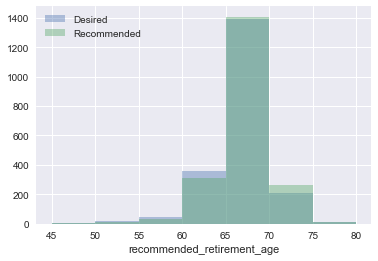

,retirement_age,recommended_retirement_age
0.2,64.0,65.0
0.4,65.0,66.0
0.6,67.0,67.0
0.8,67.0,69.0


In [14]:
#Visualization 8.1: Distribution of desired and recommended retirement ages

# distribution data
retirementAge = df.iloc[:,[3, 102]]
sns.set()
bins=[45, 50, 55, 60, 65, 70, 75, 80]
sns.distplot(retirementAge.retirement_age, kde=False, bins=bins, label="Desired")
sns.distplot(retirementAge.recommended_retirement_age, kde=False, bins=bins, label="Recommended")
plt.legend()
plt.show()

# quartiles or quantile data
retirementAge.quantile([0.2, 0.4, 0.6, 0.8])

In [15]:
#Calculate retirement age weights
countRetAgeUnder50 = sum(df.retirement_age<=50)
weightRetAgeUnder50 = countRetAgeUnder50/df.age.count()
#print(weightRetAgeUnder50)

countRetAge55 = sum((df.retirement_age>50) & (df.retirement_age <=60))
weightRetAge55 = countRetAge55/df.age.count()
#print(weightRetAge55)

countRetAge65 = sum((df.retirement_age>60) & (df.retirement_age <=70))
weightRetAge65 = countRetAge65/df.age.count()
#print(weightRetAge65)

print (tabulate([["Retirement Age 45", weightRetAgeUnder50], ["Retirement Age 55", weightRetAge55], 
                ["Retirement Age 65", weightRetAge65]], 
         headers=['Category', 'Weight']))

Category               Weight
-----------------  ----------
Retirement Age 45  0.00538951
Retirement Age 55  0.0636943
Retirement Age 65  0.905439


In [16]:
#Visualization 8.3: Distribution of difference in desired and recommended retirement ages

new = df.iloc[:,[0, 3, 102]]
# filter out retired users
nonRetiredUsers = new[new.age<new.retirement_age]
diffRet = nonRetiredUsers['recommended_retirement_age'] - nonRetiredUsers['retirement_age'] 

#plotting
sns.set()
bins=[-5, -4, -3,-2,-1,0,1,2,3,4,5]
sns.distplot(diffRet, kde=False, bins=bins)


#quantile data
diffRet.quantile([0.2,0.4,0.6,0.8])

0.2    0.0
0.4    0.0
0.6    1.0
0.8    2.0
dtype: float64

In [17]:
#Visualization 9: Distribution of Salary (Unconditional)
salary = df.iloc[:,[2]]
cleanSalary = salary[salary['salary']>1000]

sns.set()
#bins=[0,25000,40000,50000,60000,75000,100000, 200000, 500000, 750000]
sns.distplot(cleanSalary, kde=False, bins=10) #by changing the bins parameter to 'bins', you can specify the bins manually.

#quantiles
cleanSalary.quantile([0.2,0.4,0.6,0.8])

,salary
0.2,40000.0
0.4,55000.0
0.6,75000.0
0.8,100000.0


In [18]:
#Visualization 10: Distribution of Salary conditional on marital status

salaryAndMarital = df.iloc[:,[2, 4, 15]]

#single
singleSalaryAndMarital = salaryAndMarital[salaryAndMarital.marital_status==False]
singleSalary = singleSalaryAndMarital.iloc[:,[0]]
singleClean = singleSalary[np.isfinite(singleSalary['salary']) & (singleSalary['salary']>1000)]


#married
marriedSalaryAndMarital = salaryAndMarital[salaryAndMarital.marital_status==True]
marriedSalary = marriedSalaryAndMarital.iloc[:,[0, 2]]
marriedSalary['combined_salary'] = marriedSalary['salary'] + marriedSalary['spouse_salary'] 
marriedCombined = marriedSalary.iloc[:,[2]]
marriedClean = marriedCombined[np.isfinite(marriedCombined['combined_salary']) & (marriedCombined['combined_salary']>1000)]


#plotting
sns.distplot(marriedClean, kde=False, label="Married")
sns.distplot(singleClean, kde=False, label="Single")
plt.legend()


# quantiles 
quantileMarried = marriedClean.quantile([0.2,0.4,0.6,0.8])
quantileSingle = singleClean.quantile([0.2,0.4,0.6,0.8])
quantileSingle.join(quantileMarried, lsuffix='salary', rsuffix='combined_salary')

,salary,combined_salary
0.2,39000.0,45000.0
0.4,52000.0,60001.0
0.6,70000.0,80000.0
0.8,93000.0,110000.0


In [19]:
#Visualization 11: Distribution of Salary conditional on age

salary = df.iloc[:,[0, 2, 3]]

#filter out salary lower than $1,000
cleanSalary = salary[salary['salary']>1000]

#filter retirement users out
filterRetiredUsers = salary[salary['age']<salary['retirement_age']]

#plotting
sns.jointplot(x="age", y="salary", data=filterRetiredUsers, size=10, dropna=True, ratio=2, space=0.05)

#bins = [30, 40, 50, 60, 65, 70]
#sns.regplot(x="age", y="salary", data=filterRetiredUsers, x_bins=bins)

In [20]:
#Visualization 12: Distribution of combined pension and annuity as % of salary
vis12 = df.iloc[:,[2, 9, 10]]
vis12['combined_GI'] = vis12['pensions'] + vis12['annuities'] 

# let's filter out people don't have pensions and annuity 
vis12Clean = vis12[(vis12.combined_GI!=0) & (vis12['salary']>1000)]

vis12Clean['ratio'] = vis12Clean['combined_GI']/vis12Clean['salary']
vis12CleanRatio = vis12Clean[vis12Clean.ratio>0]
quantileVis12Clean = vis12CleanRatio['ratio'].quantile([0.2,0.4, 0.5, 0.6,0.85])
print(quantileVis12Clean)

#bins=[0,0.10, 0.25, 0.5, 1, 1.5, 2,2.5,3]
#sns.distplot(vis12CleanRatio.ratio, kde=False, axlabel="Ratio of Combined Guaranteed Income to Salary", bins=bins)

#the following shows bivariate relationship between combined guaranteed income and salary
#sns.jointplot(x="salary", y="combined_GI", data=vis12Clean, size = 10, ratio=2, space =0.05)

#bins = [10000, 30000, 40000, 50000, 60000, 75000, 100000, 150000, 7500000]
#sns.regplot(x="salary", y="combined_GI", data=vis12Clean, x_bins=bins) ## can also specify bins by #

0.20    0.093506
0.40    0.178571
0.50    0.225000
0.60    0.284444
0.85    0.525000
Name: ratio, dtype: float64


/Users/looks/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/looks/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [79]:
#Weights by Guaranteed Income and SS Benefit by Middle Age
GuarIncSSBenAndAge = df.iloc[:,[0, 2, 9, 10,11]]
GuarIncSSBenAndAge['combined_GI'] = GuarIncSSBenAndAge['pensions'] + GuarIncSSBenAndAge['annuities'] 
GuarIncSSBenAndAge['ratio'] = GuarIncSSBenAndAge['combined_GI']/GuarIncSSBenAndAge['salary']

CountMiddle = sum((df.age>50) & (df.age<=60))
WeightMiddleNoGuarIncNoSS = sum((GuarIncSSBenAndAge.age>50) 
                                & (GuarIncSSBenAndAge.age<=60) 
                                &(GuarIncSSBenAndAge.combined_GI == 0)
                                &(GuarIncSSBenAndAge.social_security_benefit <= 10000))/CountMiddle
#print(WeightMiddleNoGuarIncNoSS)

WeightMiddleNoGuarIncSSBenefit = sum((GuarIncSSBenAndAge.age>50) 
                                     & (GuarIncSSBenAndAge.age<=60) 
                                     &(GuarIncSSBenAndAge.combined_GI == 0)
                                     &(GuarIncSSBenAndAge.social_security_benefit > 10000))/CountMiddle

#print(WeightMiddleNoGuarIncSSBenefit)

WeightMiddleGuarIncNoSS = sum((GuarIncSSBenAndAge.age>50) 
                              & (GuarIncSSBenAndAge.age<=60) 
                              &(GuarIncSSBenAndAge.combined_GI > 0)
                              &(GuarIncSSBenAndAge.social_security_benefit <= 10000))/CountMiddle

#print(WeightMiddleGuarIncNoSS) 

WeightMiddleGuarIncLowSS = sum((GuarIncSSBenAndAge.age>50) & (GuarIncSSBenAndAge.age<=60) 
                               &(GuarIncSSBenAndAge.combined_GI > 0)& (GuarIncSSBenAndAge.ratio <= 0.5) 
                               &(GuarIncSSBenAndAge.social_security_benefit > 10000))/CountMiddle
WeightMiddleGuarIncLow = WeightMiddleGuarIncLowSS + WeightMiddleGuarIncNoSS
#print(WeightMiddleGuarIncLow)

#Calculate proportion of investors who are SS < $10k and have guaranteed income and assign to investors with SS but no Guar Inc
WeightMiddleGuarIncHighNoSS = sum((GuarIncSSBenAndAge.age>50) & (GuarIncSSBenAndAge.age<=60) &
                                  (GuarIncSSBenAndAge.combined_GI > 0.5) 
                                  &(GuarIncSSBenAndAge.social_security_benefit < 10000))/CountMiddle

WeightMiddleNoGuarIncSSBenefit = WeightMiddleNoGuarIncSSBenefit + WeightMiddleGuarIncHighNoSS

#Remaining weight attributable to high guaranteed income
WeightMiddleGuarIncHigh = 1 - WeightMiddleNoGuarIncNoSS - WeightMiddleNoGuarIncSSBenefit - WeightMiddleGuarIncLow

print (tabulate([["Middle Age No Guar Inc or SS", WeightMiddleNoGuarIncNoSS], ["Middle Age No Guar Inc", WeightMiddleNoGuarIncSSBenefit], 
                 ["Middle Age Guar Inc Low", WeightMiddleGuarIncLow], ["Middle Age Guar Inc High", WeightMiddleGuarIncHigh]], 
         headers=['Category', 'Weight']))



print(WeightMiddleGuarIncHighNoSS)

Category                         Weight
----------------------------  ---------
Middle Age No Guar Inc or SS  0.0217822
Middle Age No Guar Inc        0.827723
Middle Age Guar Inc Low       0.138614
Middle Age Guar Inc High      0.0118812
0.0019801980198


/Users/looks/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/looks/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [80]:
#Weights by Guaranteed Income and SS Benefit by Old Age
CountOld= sum((df.age>60))

WeightOldNoGuarIncNoSS = sum((GuarIncSSBenAndAge.age>60) 
                             &(GuarIncSSBenAndAge.combined_GI == 0)
                             &(GuarIncSSBenAndAge.social_security_benefit <= 10000))/CountOld
#print(WeightOldNoGuarIncNoSS)

WeightOldNoGuarIncSSBenefit = sum((GuarIncSSBenAndAge.age>60) 
                                  &(GuarIncSSBenAndAge.combined_GI == 0)
                                  &(GuarIncSSBenAndAge.social_security_benefit > 10000))/CountOld

#print(WeightOldNoGuarIncSSBenefit)

WeightOldGuarIncNoSS = sum((GuarIncSSBenAndAge.age>60) 
                           &(GuarIncSSBenAndAge.combined_GI > 0)
                           &(GuarIncSSBenAndAge.social_security_benefit <= 10000))/CountOld

#print(WeightOldGuarIncNoSS)

WeightOldGuarIncLowSS = sum((GuarIncSSBenAndAge.age>60) 
                            &(GuarIncSSBenAndAge.combined_GI > 0) 
                            &(GuarIncSSBenAndAge.ratio <= 0.5) 
                            &(GuarIncSSBenAndAge.social_security_benefit > 10000))/CountOld
#print(WeightOldGuarIncLow)

#Calculate proportion of investors who are SS < $10k and have guaranteed income and assign to investors with SS but no Guar Inc
WeightOldGuarIncHighNoSS = sum((GuarIncSSBenAndAge.age>60) &
                                  (GuarIncSSBenAndAge.combined_GI > 0.5) 
                                  &(GuarIncSSBenAndAge.social_security_benefit < 10000))/CountOld

WeightOldNoGuarIncSSBenefit = WeightOldNoGuarIncSSBenefit + WeightOldGuarIncHighNoSS

WeightOldGuarIncLow = WeightOldGuarIncNoSS +WeightOldGuarIncLowSS
WeightOldGuarIncHigh = 1 - WeightOldNoGuarIncNoSS - WeightOldNoGuarIncSSBenefit - WeightOldGuarIncLow

print (tabulate([["Old Age No Guar Inc or SS", WeightOldNoGuarIncNoSS], ["Old Age No Guar Inc", WeightOldNoGuarIncSSBenefit], 
                ["Old Age Guar Inc Low", WeightOldGuarIncLow], ["Old Age Guar Inc High", WeightOldGuarIncHigh]], 
         headers=['Category', 'Weight']))

Category                      Weight
-------------------------  ---------
Old Age No Guar Inc or SS  0.0224404
Old Age No Guar Inc        0.639551
Old Age Guar Inc Low       0.286115
Old Age Guar Inc High      0.0518934


In [23]:
#Visualization 13: Distribution of ratio of spouse social security benefit to investor (only married investors)
vis13 = df.iloc[:,[2, 4, 11, 17]]

#add filter for salary > 1000
cleanSpouseSS = vis13[(vis13.spouse_social_security_benefit>1) & (vis13.salary > 1000)]
cleanSpouseSS['ratio'] = cleanSpouseSS['spouse_social_security_benefit']/cleanSpouseSS['social_security_benefit']
sns.distplot(cleanSpouseSS.ratio, kde=False, axlabel="Ratio of Investor SS to Spouse")

#quantiles
#print(cleanSpouseSS.ratio.quantile([0.2, 0.4, 0.6, 0.8]))


# ratio of married investors who do have spousal SS > 1 / count of married investors
married = vis13[vis13.marital_status==True]
marriedSpouseSS = vis13[(vis13.marital_status==True) & (vis13.spouse_social_security_benefit>1)]
ratioSpouseSSMarried = np.true_divide(marriedSpouseSS.shape[0], married.shape[0])
print ("Ratio of Married Investors who have a Spousal SS greater than $0 to number of married investors: {0:.0f}%".format(ratioSpouseSSMarried * 100))

Ratio of Married Investors who have a Spousal SS greater than $0 to number of married investors: 39%


/Users/looks/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [24]:
#Visualization of spousal SS over investor SS benefit
vis13 = df.iloc[:,[2, 4, 11, 17]]

#add filter for salary > 1000
cleanSpouseSS = vis13[(vis13.spouse_social_security_benefit>1) & (vis13.salary > 1000)]
cleanSpouseSS['ratio'] = cleanSpouseSS['spouse_social_security_benefit']/cleanSpouseSS['social_security_benefit']
bins=[0, 1, 2, 3, 4]
plt.hist(cleanSpouseSS.ratio, bins=bins)
plt.xlabel("Ratio of Investor SS to Spouse")
plt.ylabel("Couhttp://localhost:8889/notebooks/code/PythonBasics/TAProdDataAnalysis/TAProdDataAnalysis.ipynb#nt")

#quantiles
print(cleanSpouseSS.ratio.quantile([0.2, 0.4, 0.6, 0.8]))

0.2    0.395115
0.4    0.462674
0.6    0.500000
0.8    0.670484
Name: ratio, dtype: float64


/Users/looks/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [25]:
#calculate count of investors with $0 SS Benefit
countNoSS = sum(df.social_security_benefit<1)
print(countNoSS)

18


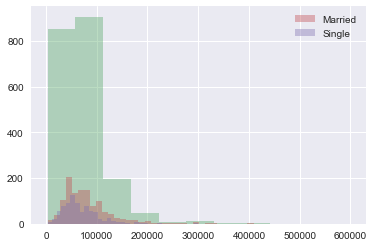

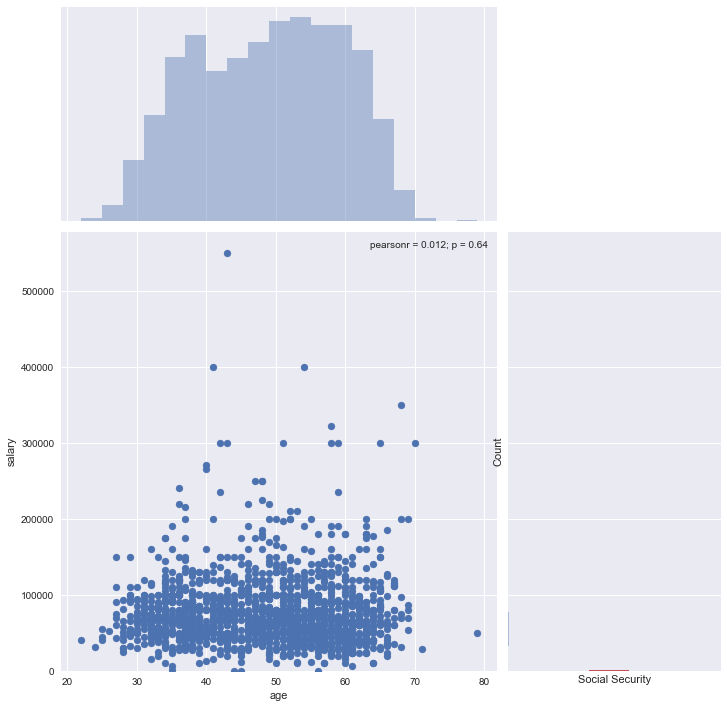

0.2    18000.00
0.4    22344.00
0.6    27052.80
0.8    31962.24
Name: social_security_benefit, dtype: float64


In [26]:
#Visualization 13 continued: Investor Social Security benefit
InvestorSocialSecurityBen = df.iloc[:,[2, 4, 11, 17]]
bins=[0,5000,10000,15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000]
plt.hist(df.social_security_benefit, bins=bins)
plt.xlabel("Social Security")
plt.ylabel("Count")
plt.show()

#quantiles
print(df.social_security_benefit.quantile([0.2, 0.4, 0.6, 0.8]))

In [27]:
#Visualizations 14: Distribution of Sum of Advisable IRA Balance – unconditional

# Roth IRA
df.name_type_1.unique()
roth_ira_1 = df.balance_1[df.name_type_1 == "roth_ira"]
roth_ira_2 = df.balance_2[df.name_type_2 == "roth_ira"]
roth_ira_3 = df.balance_3[df.name_type_3 == "roth_ira"]
roth_ira_4 = df.balance_4[df.name_type_4 == "roth_ira"]
roth_ira_5 = df.balance_5[df.name_type_5 == "roth_ira"]
roth_ira_6 = df.balance_6[df.name_type_6 == "roth_ira"]
roth_ira_7 = df.balance_7[df.name_type_7 == "roth_ira"]
roth_ira_8 = df.balance_8[df.name_type_8 == "roth_ira"]
roth_ira_9 = df.balance_9[df.name_type_9 == "roth_ira"]
roth_ira_10 = df.balance_10[df.name_type_10 == "roth_ira"]
roth_ira_11 = df.balance_11[df.name_type_11 == "roth_ira"]
#traditional IRA
traditional_ira_1 = df.balance_1[df.name_type_1 == "traditional_ira"]
traditional_ira_2 = df.balance_2[df.name_type_2 == "traditional_ira"]
traditional_ira_3 = df.balance_3[df.name_type_3 == "traditional_ira"]
traditional_ira_4 = df.balance_4[df.name_type_4 == "traditional_ira"]
traditional_ira_5 = df.balance_5[df.name_type_5 == "traditional_ira"]
traditional_ira_6 = df.balance_6[df.name_type_6 == "traditional_ira"]
traditional_ira_7 = df.balance_7[df.name_type_7 == "traditional_ira"]
traditional_ira_8 = df.balance_8[df.name_type_8 == "traditional_ira"]
traditional_ira_9 = df.balance_9[df.name_type_9 == "traditional_ira"]
traditional_ira_10 = df.balance_10[df.name_type_10 == "traditional_ira"]
traditional_ira_11 = df.balance_11[df.name_type_11 == "traditional_ira"]

#Brokerage
brokerage_1 = df.balance_1[df.name_type_1 == "brokerage"]
brokerage_2 = df.balance_2[df.name_type_2 == "brokerage"]
brokerage_3 = df.balance_3[df.name_type_3 == "brokerage"]
brokerage_4 = df.balance_4[df.name_type_4 == "brokerage"]
brokerage_5 = df.balance_5[df.name_type_5 == "brokerage"]
brokerage_6 = df.balance_6[df.name_type_6 == "brokerage"]
brokerage_7 = df.balance_7[df.name_type_7 == "brokerage"]
brokerage_8 = df.balance_8[df.name_type_8 == "brokerage"]
brokerage_9 = df.balance_9[df.name_type_9 == "brokerage"]
brokerage_10 = df.balance_10[df.name_type_10 == "brokerage"]
brokerage_11 = df.balance_11[df.name_type_11 == "brokerage"]


IRA = [roth_ira_1, roth_ira_2, roth_ira_3, roth_ira_4, 
            roth_ira_5, roth_ira_6, roth_ira_7, roth_ira_8, 
            roth_ira_9, roth_ira_10, roth_ira_11,
      traditional_ira_1, traditional_ira_2, traditional_ira_3, 
      traditional_ira_4, traditional_ira_5, traditional_ira_6, 
      traditional_ira_7, traditional_ira_8, traditional_ira_9, 
      traditional_ira_10, traditional_ira_11]


Brokerage = [brokerage_1, brokerage_2, brokerage_3, brokerage_4, 
            brokerage_5, brokerage_6, brokerage_7, brokerage_8, 
            brokerage_9, brokerage_10, brokerage_11]



# account balance must be greater than $0 
iraAccounts = pd.DataFrame(pd.concat(IRA))
iraAccounts.columns = ['ira_balance']
cleanIRA = iraAccounts[iraAccounts.ira_balance > 1]
#bins=[0,25000,50000,75000,100000,150000,500000,2500000]
sns.distplot(cleanIRA, kde=False, bins=20)


# proportion of users with $0 vs non-zero balance
dirtyIRA = iraAccounts[iraAccounts.ira_balance < 1]
countClean = cleanIRA.shape[0]
countDirty = dirtyIRA.shape[0]
countAll = iraAccounts.shape[0]


print('Ratio of non-zero balance to total:', (100*(np.true_divide(countClean, countAll))))
print('Ratio of zero balance to total:', (100*(np.true_divide(countDirty, countAll))))

# ratio of sum of balances to salary 
cleanIRAWSalary = cleanIRA.merge(df[['salary']], left_index=True, right_index=True)
cleanIRAWSalaryRatio = pd.DataFrame(np.true_divide(cleanIRAWSalary.ira_balance, cleanIRAWSalary.salary))

Ratio of non-zero balance to total: 82.1088053842
Ratio of zero balance to total: 17.8911946158


In [28]:
#Calculate sum of IRA and Brokerage account balance


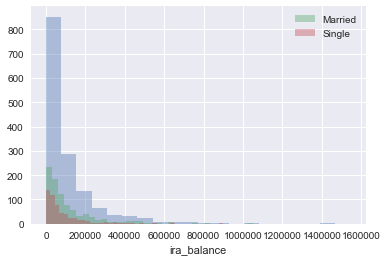

In [29]:
# Visualization 15: Distribution of Sum of Advisable IRA Balance – conditional on marital status
iradf = pd.concat(IRA)
iradf = iradf.to_frame()
iradf.columns = ['ira_balance']

iraMarital = iradf.merge(df[['marital_status']], left_index=True, right_index=True)
iraSingle = iraMarital[(iraMarital.ira_balance>0) & (iraMarital.marital_status==False)]
iraMarried = iraMarital[(iraMarital.ira_balance>0) & (iraMarital.marital_status==True)]

#plotting
sns.distplot(iraMarried.ira_balance, kde=False, label = "Married")
sns.distplot(iraSingle.ira_balance, kde=False, label="Single")
plt.legend()
plt.show()

/Users/looks/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning:

reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead



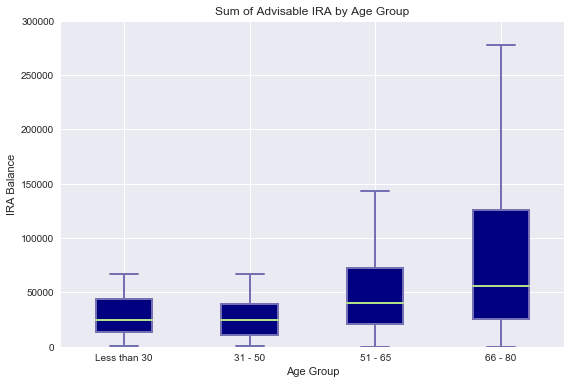

In [30]:
# Visualization 16: Distribution of Sum of Advisable IRA Balance – conditional on age
iraAge = iradf.merge(df[['age']], left_index=True, right_index=True)
iraAgeClean = iraAge[iraAge.ira_balance>0]
#sns.regplot(x="age", y="ira_balance", data=iraAgeClean, x_bins=12)


# define age groups here
ageGroup1 = iraAgeClean.ira_balance[iraAgeClean.age<=30]
ageGroup2 = iraAgeClean.ira_balance[(iraAgeClean.age<=31) & (iraAgeClean.age<=50)]
ageGroup3 = iraAgeClean.ira_balance[(iraAgeClean.age<=51) & (iraAgeClean.age<=65)]
ageGroup4 = iraAgeClean.ira_balance[(iraAgeClean.age<=66) & (iraAgeClean.age<=80)]


data_to_plot = [ageGroup1, ageGroup2, ageGroup3, ageGroup4]


# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot, patch_artist=True, )
ax.set_xlabel('Age Group')
ax.set_ylabel('IRA Balance')
ax.set_title('Sum of Advisable IRA by Age Group')
ax.set_ylim([0, 300000])
ax.set_xticklabels(['Less than 30', '31 - 50', '51 - 65', '66 - 80'])


## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#000080' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

plt.show()

/Users/looks/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning:

reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead



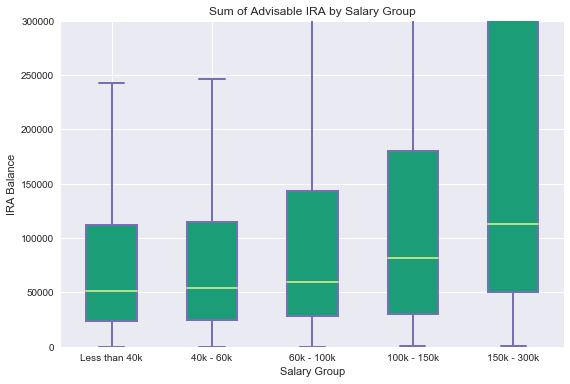

In [31]:
# Visualization 17: Distribution of Sum of Advisable IRA Balance – conditional on salary

iraSalary = iradf.merge(df[['salary']], left_index=True, right_index=True)
iraSalaryClean = iraSalary[(iraSalary.ira_balance>0) & (iraSalary.salary>1000)]
#sns.jointplot(x="salary", y="ira_balance", data=iraSalaryClean, size = 10)

# define salary groups here
salaryGroup1 = iraSalaryClean.ira_balance[iraSalaryClean.salary<=40000]
salaryGroup2 = iraSalaryClean.ira_balance[(iraSalaryClean.salary>=40001) & (iraSalaryClean.salary<=60000)]
salaryGroup3 = iraSalaryClean.ira_balance[(iraSalaryClean.salary>=60001) & (iraSalaryClean.salary<=100000)]
salaryGroup4 = iraSalaryClean.ira_balance[(iraSalaryClean.salary>=100001) & (iraSalaryClean.salary<=150000)]
salaryGroup5 = iraSalaryClean.ira_balance[(iraSalaryClean.salary>=150001) & (iraSalaryClean.salary<=300000)]


data_to_plot = [salaryGroup1, salaryGroup2, salaryGroup3, salaryGroup4, salaryGroup5]


# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot, patch_artist=True, )
ax.set_xlabel('Salary Group')
ax.set_ylabel('IRA Balance')
ax.set_title('Sum of Advisable IRA by Salary Group')
ax.set_ylim([0, 300000])
ax.set_xticklabels(['Less than 40k', '40k - 60k', '60k - 100k', '100k - 150k', '150k - 300k'])


## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)  

plt.show()

In [32]:
#Salary Level Weights
TotalCount=df.age.count()

salaryLow= sum(df.salary<=60000)
salaryMedium = sum((df.salary>=60001) & (df.salary <=100000))
salaryHigh = sum(df.salary>=100001)

#print(salaryLow/TotalCount)
#print(salaryMedium/TotalCount)
#print(salaryHigh/TotalCount)     

print (tabulate([["Low Salary", salaryLow/TotalCount], ["Middle Salary", salaryMedium/TotalCount], 
                ["High Salary", salaryHigh/TotalCount]], 
         headers=['Category', 'Weight']))


Category         Weight
-------------  --------
Low Salary     0.474767
Middle Salary  0.353748
High Salary    0.171485


In [33]:
# Account Balance Dimension

iraSalary = iradf.merge(df[['salary']], left_index=True, right_index=True)
iraSalaryClean = iraSalary[(iraSalary.ira_balance>0) & (iraSalary.salary>1000)]

#Calculate ratio of IRA account balance over salary
iraSalaryClean['ratio'] = iraSalaryClean['ira_balance']/iraSalaryClean['salary'] 
iraSalaryClean.quantile([0.05,0.1,0.5,0.95])

/Users/looks/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,ira_balance,salary,ratio
0.05,4499.016393,25000.0,0.065324
0.10,10100.997300,34000.0,0.132654
0.50,60207.969000,65000.0,0.913628
0.95,420629.249000,150000.0,6.457150


In [34]:
# DEPRECATED
#salaryGroup1 = iraSalaryClean.ira_balance[iraSalaryClean.salary<=60000]
#iraGroup1 = salaryGroup1.apply(divideBySalaryGroup1) #divide by low salary 
#quantiles
#iraGroup1.quantile([0.25,0.5,0.75])

In [35]:
# DEPRECATED
#salary group 2
#salaryGroup2 = iraSalaryClean.ira_balance[(iraSalaryClean.salary>=60001) & (iraSalaryClean.salary<=100000)]
#iraGroup2 = salaryGroup2.apply(divideBySalaryGroup2) #divide by medium salary
#quantiles
#iraGroup2.quantile([0.25,0.5,0.75])

In [36]:
# DEPRECATED
#salary group 3
#salaryGroup3 = iraSalaryClean.ira_balance[(iraSalaryClean.salary>=100001)]
#iraGroup3 = salaryGroup2.apply(divideBySalaryGroup3) #divide by high salary
#quantiles
#iraGroup3.quantile([0.25,0.5,0.75])

In [37]:
# DEPRECATED
#iraSalaryClean = iraSalary[(iraSalary.ira_balance>0) & (iraSalary.salary>1000)]
#salaryGroupAll = iraSalaryClean.ira_balance
#iraGroupAll = salaryGroupAll.apply(divideBySalaryGroup1)
#iraGroupAll.quantile([0.25,0.5,0.75])

In [38]:
# DEPRECATED
#iraSalaryClean = iraSalary[(iraSalary.ira_balance>0) & (iraSalary.salary>1000)]
#salaryGroupAll = iraSalaryClean.ira_balance
#iraGroupAll = salaryGroupAll.apply(divideBySalaryGroup2)
#iraGroupAll.quantile([0.1,0.5,0.9])

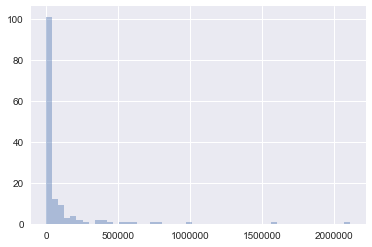

In [39]:
# Visualization 18: Distribution of Sum of Advisable Taxable Brokerage Account Balance – unconditional
brokeragedf = pd.concat(Brokerage)
brokeragedf = brokeragedf.to_frame()
brokeragedf.columns = ['brokerage_balance']
sns.distplot(brokeragedf, kde=False)
plt.show()

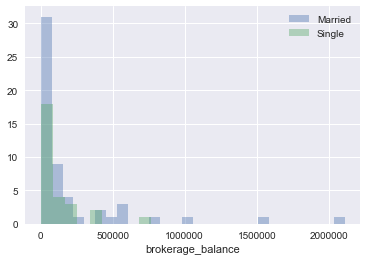

In [40]:
# Visualization 19: Distribution of Sum of Advisable Taxable Brokerage Balance – conditional on marital status

brokerageMarital = brokeragedf.merge(df[['marital_status']], left_index=True, right_index=True)
brokerageSingle = brokerageMarital[(brokerageMarital.brokerage_balance>0) & (brokerageMarital.marital_status==False)]
brokerageMarried = brokerageMarital[(brokerageMarital.brokerage_balance>0) & (brokerageMarital.marital_status==True)]

sns.distplot(brokerageMarried.brokerage_balance, kde=False, label = "Married")
sns.distplot(brokerageSingle.brokerage_balance, kde=False, label="Single")
plt.legend()
plt.show()

/Users/looks/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning:

reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead



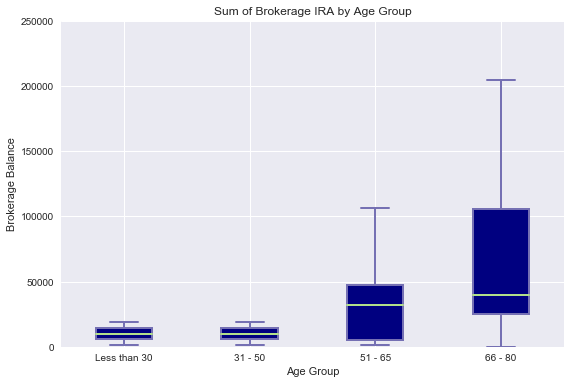

In [41]:
# Visualization 20: Distribution of Sum of Taxable Brokerage Balance – conditional on age
brokerageAge = brokeragedf.merge(df[['age']], left_index=True, right_index=True)
brokerageAgeClean = brokerageAge[brokerageAge.brokerage_balance>0]
#sns.jointplot(x="age", y="brokerage_balance", data=brokerageAgeClean, size = 10)


# define age groups here
ageGroup1 = brokerageAgeClean.brokerage_balance[brokerageAgeClean.age<=30]
ageGroup2 = brokerageAgeClean.brokerage_balance[(brokerageAgeClean.age<=31) & (brokerageAgeClean.age<=50)]
ageGroup3 = brokerageAgeClean.brokerage_balance[(brokerageAgeClean.age<=51) & (brokerageAgeClean.age<=65)]
ageGroup4 = brokerageAgeClean.brokerage_balance[(brokerageAgeClean.age<=66) & (brokerageAgeClean.age<=80)]


data_to_plot = [ageGroup1, ageGroup2, ageGroup3, ageGroup4]


# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot, patch_artist=True, )
ax.set_xlabel('Age Group')
ax.set_ylabel('Brokerage Balance')
ax.set_title('Sum of Brokerage IRA by Age Group')
ax.set_ylim([0, 250000])
ax.set_xticklabels(['Less than 30', '31 - 50', '51 - 65', '66 - 80'])


## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#000080' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

plt.show()

/Users/looks/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning:

reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead



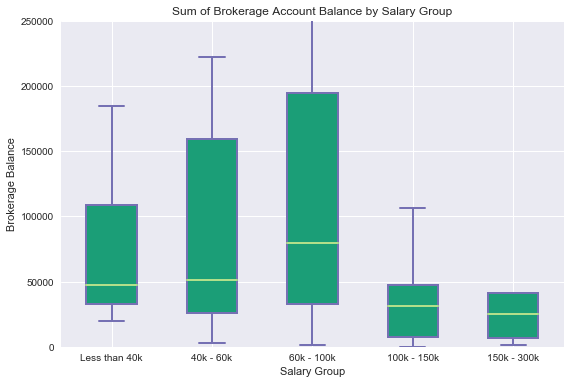

In [42]:
# Visualization 21: Distribution of Sum of Taxable Brokerage Balance – conditional on salary
brokerageSalary = brokeragedf.merge(df[['salary']], left_index=True, right_index=True)
brokerageSalaryClean = brokerageSalary[(brokerageSalary.brokerage_balance>0) & (brokerageSalary.salary>1000)]
#sns.jointplot(x="salary", y="brokerage_balance", data=brokerageSalaryClean, size = 10)


# define salary groups here
salaryGroup1 = brokerageSalaryClean.brokerage_balance[brokerageSalaryClean.salary<=40000]
salaryGroup2 = brokerageSalaryClean.brokerage_balance[(brokerageSalaryClean.salary>=40001) & (brokerageSalaryClean.salary<=60000)]
salaryGroup3 = brokerageSalaryClean.brokerage_balance[(brokerageSalaryClean.salary>=60001) & (brokerageSalaryClean.salary<=100000)]
salaryGroup4 = brokerageSalaryClean.brokerage_balance[(brokerageSalaryClean.salary>=100001) & (brokerageSalaryClean.salary<=150000)]
salaryGroup5 = brokerageSalaryClean.brokerage_balance[(brokerageSalaryClean.salary>=150001) & (brokerageSalaryClean.salary<=300000)]


data_to_plot = [salaryGroup1, salaryGroup2, salaryGroup3, salaryGroup4, salaryGroup5]


# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot, patch_artist=True, )
ax.set_xlabel('Salary Group')
ax.set_ylabel('Brokerage Balance')
ax.set_title('Sum of Brokerage Account Balance by Salary Group')
ax.set_ylim([0, 250000])
ax.set_xticklabels(['Less than 40k', '40k - 60k', '60k - 100k', '100k - 150k', '150k - 300k'])


## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)    

plt.show()

In [43]:
#Calculate ratio of brokerage account balance over salary
brokerageSalaryClean['ratio'] = brokerageSalaryClean['brokerage_balance']/brokerageSalaryClean['salary'] 
brokerageSalaryClean.quantile([0.05,0.1,0.5,0.95])

/Users/looks/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,brokerage_balance,salary,ratio
0.05,2763.225702,23928.0,0.035476
0.10,6122.188551,25400.0,0.061583
0.50,44780.833130,74000.0,0.930488
0.95,743057.062730,329200.0,6.591384


In [44]:
# DEPRECATED
#salaryGroup1 = brokerageSalaryClean.brokerage_balance[brokerageSalaryClean.salary<=60000]
#salaryGroup2 = brokerageSalaryClean.brokerage_balance[(brokerageSalaryClean.salary>=60001) & (brokerageSalaryClean.salary<=100000)]
#salaryGroup3 = brokerageSalaryClean.brokerage_balance[(brokerageSalaryClean.salary>=100001)]
#brokerageSalaryClean = brokerageSalaryClean[(brokerageSalaryClean.brokerage_balance>0) & (brokerageSalaryClean.salary>1000)]

#salaryGroupAll = brokerageSalaryClean.brokerage_balance
#BrokerageGroupAll = salaryGroupAll.apply(divideBySalaryGroup2)
#BrokerageGroupAll.quantile([0.1,0.5,0.90])

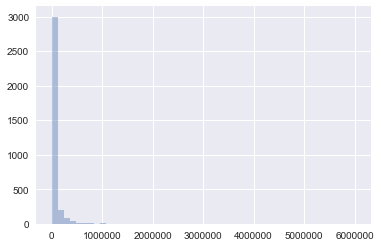

In [45]:
# Visualization 22: Distribution of Sum of Other Account Balance – unconditional

# 403b
account_1_403b = df.balance_1[df.name_type_1 == "403b"]
account_2_403b = df.balance_2[df.name_type_2 == "403b"]
account_3_403b = df.balance_3[df.name_type_3 == "403b"]
account_4_403b = df.balance_4[df.name_type_4 == "403b"]
account_5_403b = df.balance_5[df.name_type_5 == "403b"]
account_6_403b = df.balance_6[df.name_type_6 == "403b"]
account_7_403b = df.balance_7[df.name_type_7 == "403b"]
account_8_403b = df.balance_8[df.name_type_8 == "403b"]
account_9_403b = df.balance_9[df.name_type_9 == "403b"]
account_10_403b = df.balance_9[df.name_type_10 == "403b"]
account_11_403b = df.balance_9[df.name_type_11 == "403b"]

#account_403b = [account_1_403b, account_2_403b, account_3_403b, account_4_403b, 
#            account_5_403b, account_6_403b, account_7_403b, account_8_403b, 
#            account_9_403b, account_10_403b, account_11_403b]
#sns.distplot(pd.concat(account_403b))

# 401k
account_1_401k = df.balance_1[df.name_type_1 == "401k"]
account_2_401k = df.balance_2[df.name_type_2 == "401k"]
account_3_401k = df.balance_3[df.name_type_3 == "401k"]
account_4_401k = df.balance_4[df.name_type_4 == "401k"]
account_5_401k = df.balance_5[df.name_type_5 == "401k"]
account_6_401k = df.balance_6[df.name_type_6 == "401k"]
account_7_401k = df.balance_7[df.name_type_7 == "401k"]
account_8_401k = df.balance_8[df.name_type_8 == "401k"]
account_9_401k = df.balance_9[df.name_type_9 == "401k"]
account_10_401k = df.balance_9[df.name_type_10 == "401k"]
account_11_401k = df.balance_9[df.name_type_11 == "401k"]

#account_401k = [account_1_401k, account_2_401k, account_3_401k, account_4_401k, 
#            account_5_401k, account_6_401k, account_7_401k, account_8_401k, 
#            account_9_401k, account_10_401k, account_11_401k]

# non_qualified_defined_contribution
account_1_nqdc = df.balance_1[df.name_type_1 == "non_qualified_defined_contribution"]
account_2_nqdc = df.balance_2[df.name_type_2 == "non_qualified_defined_contribution"]
account_3_nqdc = df.balance_3[df.name_type_3 == "non_qualified_defined_contribution"]
account_4_nqdc = df.balance_4[df.name_type_4 == "non_qualified_defined_contribution"]
account_5_nqdc = df.balance_5[df.name_type_5 == "non_qualified_defined_contribution"]
account_6_nqdc = df.balance_6[df.name_type_6 == "non_qualified_defined_contribution"]
account_7_nqdc = df.balance_7[df.name_type_7 == "non_qualified_defined_contribution"]
account_8_nqdc = df.balance_8[df.name_type_8 == "non_qualified_defined_contribution"]
account_9_nqdc = df.balance_9[df.name_type_9 == "non_qualified_defined_contribution"]
account_10_nqdc = df.balance_9[df.name_type_10 == "non_qualified_defined_contribution"]
account_11_nqdc = df.balance_9[df.name_type_11 == "non_qualified_defined_contribution"]

#account_nqdc = [account_1_nqdc, account_2_nqdc, account_3_nqdc, account_4_nqdc, 
#            account_5_nqdc, account_6_nqdc, account_7_nqdc, account_8_nqdc, 
#            account_9_nqdc, account_10_nqdc, account_11_nqdc]

# profit_sharing
account_1_ps = df.balance_1[df.name_type_1 == "profit_sharing"]
account_2_ps = df.balance_2[df.name_type_2 == "profit_sharing"]
account_3_ps = df.balance_3[df.name_type_3 == "profit_sharing"]
account_4_ps = df.balance_4[df.name_type_4 == "profit_sharing"]
account_5_ps = df.balance_5[df.name_type_5 == "profit_sharing"]
account_6_ps = df.balance_6[df.name_type_6 == "profit_sharing"]
account_7_ps = df.balance_7[df.name_type_7 == "profit_sharing"]
account_8_ps = df.balance_8[df.name_type_8 == "profit_sharing"]
account_9_ps = df.balance_9[df.name_type_9 == "profit_sharing"]
account_10_ps = df.balance_9[df.name_type_10 == "profit_sharing"]
account_11_ps = df.balance_9[df.name_type_11 == "profit_sharing"]

#account_ps = [account_1_ps, account_2_ps, account_3_ps, account_4_ps, 
#            account_5_ps, account_6_ps, account_7_ps, account_8_ps, 
#            account_9_ps, account_10_ps, account_11_ps]

# 401a
account_1_401a = df.balance_1[df.name_type_1 == "401a_money_purchase"]
account_2_401a = df.balance_2[df.name_type_2 == "401a_money_purchase"]
account_3_401a = df.balance_3[df.name_type_3 == "401a_money_purchase"]
account_4_401a = df.balance_4[df.name_type_4 == "401a_money_purchase"]
account_5_401a = df.balance_5[df.name_type_5 == "401a_money_purchase"]
account_6_401a = df.balance_6[df.name_type_6 == "401a_money_purchase"]
account_7_401a = df.balance_7[df.name_type_7 == "401a_money_purchase"]
account_8_401a = df.balance_8[df.name_type_8 == "401a_money_purchase"]
account_9_401a = df.balance_9[df.name_type_9 == "401a_money_purchase"]
account_10_401a = df.balance_9[df.name_type_10 == "401a_money_purchase"]
account_11_401a = df.balance_9[df.name_type_11 == "401a_money_purchase"]

#account_401a = [account_1_401a, account_2_401a, account_3_401a, account_4_401a, 
#            account_5_401a, account_6_401a, account_7_401a, account_8_401a, 
#            account_9_401a, account_10_401a, account_11_401a]

# 457b
account_1_457b = df.balance_1[df.name_type_1 == "457b"]
account_2_457b = df.balance_2[df.name_type_2 == "457b"]
account_3_457b = df.balance_3[df.name_type_3 == "457b"]
account_4_457b = df.balance_4[df.name_type_4 == "457b"]
account_5_457b = df.balance_5[df.name_type_5 == "457b"]
account_6_457b = df.balance_6[df.name_type_6 == "457b"]
account_7_457b = df.balance_7[df.name_type_7 == "457b"]
account_8_457b = df.balance_8[df.name_type_8 == "457b"]
account_9_457b = df.balance_9[df.name_type_9 == "457b"]
account_10_457b = df.balance_9[df.name_type_10 == "457b"]
account_11_457b = df.balance_9[df.name_type_11 == "457b"]

#account_457b = [account_1_457b, account_2_457b, account_3_457b, account_4_457b, 
#            account_5_457b, account_6_457b, account_7_457b, account_8_457b, 
#            account_9_457b, account_10_457b, account_11_457b]

# 457b_government
account_1_457b_gov = df.balance_1[df.name_type_1 == "457b_government"]
account_2_457b_gov = df.balance_2[df.name_type_2 == "457b_government"]
account_3_457b_gov = df.balance_3[df.name_type_3 == "457b_government"]
account_4_457b_gov = df.balance_4[df.name_type_4 == "457b_government"]
account_5_457b_gov = df.balance_5[df.name_type_5 == "457b_government"]
account_6_457b_gov = df.balance_6[df.name_type_6 == "457b_government"]
account_7_457b_gov = df.balance_7[df.name_type_7 == "457b_government"]
account_8_457b_gov = df.balance_8[df.name_type_8 == "457b_government"]
account_9_457b_gov = df.balance_9[df.name_type_9 == "457b_government"]
account_10_457b_gov = df.balance_9[df.name_type_10 == "457b_government"]
account_11_457b_gov = df.balance_9[df.name_type_11 == "457b_government"]

#account_457b_gov = [account_1_457b_gov, account_2_457b_gov, 
#            account_3_457b_gov, account_4_457b_gov, 
#            account_5_457b_gov, account_6_457b_gov, 
#            account_7_457b_gov, account_8_457b_gov, 
#            account_9_457b_gov, account_10_457b_gov, 
#            account_11_457b_gov]


# 457b_non_profit
account_1_457b_np = df.balance_1[df.name_type_1 == "457b_non_profit"]
account_2_457b_np = df.balance_2[df.name_type_2 == "457b_non_profit"]
account_3_457b_np = df.balance_3[df.name_type_3 == "457b_non_profit"]
account_4_457b_np = df.balance_4[df.name_type_4 == "457b_non_profit"]
account_5_457b_np = df.balance_5[df.name_type_5 == "457b_non_profit"]
account_6_457b_np = df.balance_6[df.name_type_6 == "457b_non_profit"]
account_7_457b_np = df.balance_7[df.name_type_7 == "457b_non_profit"]
account_8_457b_np = df.balance_8[df.name_type_8 == "457b_non_profit"]
account_9_457b_np = df.balance_9[df.name_type_9 == "457b_non_profit"]
account_10_457b_np = df.balance_9[df.name_type_10 == "457b_non_profit"]
account_11_457b_np = df.balance_9[df.name_type_11 == "457b_non_profit"]

#account_457b_np = [account_1_457b_np, account_2_457b_np, 
#            account_3_457b_np, account_4_457b_np, 
#            account_5_457b_np, account_6_457b_np, 
#            account_7_457b_np, account_8_457b_np, 
#            account_9_457b_np, account_10_457b_np, 
#            account_11_457b_np]


# esop
account_1_esop = df.balance_1[df.name_type_1 == "esop"]
account_2_esop = df.balance_2[df.name_type_2 == "esop"]
account_3_esop = df.balance_3[df.name_type_3 == "esop"]
account_4_esop = df.balance_4[df.name_type_4 == "esop"]
account_5_esop = df.balance_5[df.name_type_5 == "esop"]
account_6_esop = df.balance_6[df.name_type_6 == "esop"]
account_7_esop = df.balance_7[df.name_type_7 == "esop"]
account_8_esop = df.balance_8[df.name_type_8 == "esop"]
account_9_esop = df.balance_9[df.name_type_9 == "esop"]
account_10_esop = df.balance_9[df.name_type_10 == "esop"]
account_11_esop = df.balance_9[df.name_type_11 == "esop"]

#account_esop = [account_1_esop, account_2_esop, account_3_esop, account_4_esop, 
#            account_5_esop, account_6_esop, account_7_esop, account_8_esop, 
#            account_9_esop, account_10_esop, account_11_esop]

# checking
account_1_checking = df.balance_1[df.name_type_1 == "checking"]
account_2_checking = df.balance_2[df.name_type_2 == "checking"]
account_3_checking = df.balance_3[df.name_type_3 == "checking"]
account_4_checking = df.balance_4[df.name_type_4 == "checking"]
account_5_checking = df.balance_5[df.name_type_5 == "checking"]
account_6_checking = df.balance_6[df.name_type_6 == "checking"]
account_7_checking = df.balance_7[df.name_type_7 == "checking"]
account_8_checking = df.balance_8[df.name_type_8 == "checking"]
account_9_checking = df.balance_9[df.name_type_9 == "checking"]
account_10_checking = df.balance_9[df.name_type_10 == "checking"]
account_11_checking = df.balance_9[df.name_type_11 == "checking"]

#account_checking = [account_1_checking, account_2_checking, account_3_checking, 
#            account_4_checking, account_5_checking, account_6_checking, 
#            account_7_checking, account_8_checking, 
#            account_9_checking, account_10_checking, 
#            account_11_checking]


# thrift_savings_plan
account_1_tsp = df.balance_1[df.name_type_1 == "thrift_savings_plan"]
account_2_tsp = df.balance_2[df.name_type_2 == "thrift_savings_plan"]
account_3_tsp = df.balance_3[df.name_type_3 == "thrift_savings_plan"]
account_4_tsp = df.balance_4[df.name_type_4 == "thrift_savings_plan"]
account_5_tsp = df.balance_5[df.name_type_5 == "thrift_savings_plan"]
account_6_tsp = df.balance_6[df.name_type_6 == "thrift_savings_plan"]
account_7_tsp = df.balance_7[df.name_type_7 == "thrift_savings_plan"]
account_8_tsp = df.balance_8[df.name_type_8 == "thrift_savings_plan"]
account_9_tsp = df.balance_9[df.name_type_9 == "thrift_savings_plan"]
account_10_tsp = df.balance_9[df.name_type_10 == "thrift_savings_plan"]
account_11_tsp = df.balance_9[df.name_type_11 == "thrift_savings_plan"]

#account_tsp = [account_1_tsp, account_2_tsp, account_3_tsp, account_4_tsp, 
#            account_5_tsp, account_6_tsp, account_7_tsp, account_8_tsp, 
#            account_9_tsp, account_10_tsp, account_11_tsp]


#other_accounts = [account_403b, account_401k, account_nqdc, account_ps,
#                 account_401a, account_457b, account_457b_gov, account_457b_np,
#                 account_esop, account_checking, account_tsp]


other_accounts = [
    #403b
    account_1_403b, account_2_403b, account_3_403b, account_4_403b, 
    account_5_403b, account_6_403b, account_7_403b, account_8_403b, 
    account_9_403b, account_10_403b, account_11_403b,
    
    #401k
    account_1_401k, account_2_401k, account_3_401k, account_4_401k, 
    account_5_401k, account_6_401k, account_7_401k, account_8_401k, 
    account_9_401k, account_10_401k, account_11_401k,
    
    #nqdc
    account_1_nqdc, account_2_nqdc, account_3_nqdc, account_4_nqdc, 
    account_5_nqdc, account_6_nqdc, account_7_nqdc, account_8_nqdc, 
    account_9_nqdc, account_10_nqdc, account_11_nqdc,
    
    #ps
    account_1_ps, account_2_ps, account_3_ps, account_4_ps, 
    account_5_ps, account_6_ps, account_7_ps, account_8_ps, 
    account_9_ps, account_10_ps, account_11_ps,
    
    #401a
    account_1_401a, account_2_401a, account_3_401a, account_4_401a, 
    account_5_401a, account_6_401a, account_7_401a, account_8_401a, 
    account_9_401a, account_10_401a, account_11_401a,
    
    #457b
    account_1_457b, account_2_457b, account_3_457b, account_4_457b, 
    account_5_457b, account_6_457b, account_7_457b, account_8_457b, 
    account_9_457b, account_10_457b, account_11_457b,
    
    #457b_gov
    account_1_457b_gov, account_2_457b_gov, 
    account_3_457b_gov, account_4_457b_gov, 
    account_5_457b_gov, account_6_457b_gov, 
    account_7_457b_gov, account_8_457b_gov, 
    account_9_457b_gov, account_10_457b_gov, 
    account_11_457b_gov,
    
    #457b_np
    account_1_457b_np, account_2_457b_np, 
    account_3_457b_np, account_4_457b_np, 
    account_5_457b_np, account_6_457b_np, 
    account_7_457b_np, account_8_457b_np, 
    account_9_457b_np, account_10_457b_np, 
    account_11_457b_np,
    
    #esop
    account_1_esop, account_2_esop, account_3_esop, account_4_esop, 
    account_5_esop, account_6_esop, account_7_esop, account_8_esop, 
    account_9_esop, account_10_esop, account_11_esop,
    
    #checking
    account_1_checking, account_2_checking, account_3_checking, 
    account_4_checking, account_5_checking, account_6_checking, 
    account_7_checking, account_8_checking, 
    account_9_checking, account_10_checking, 
    account_11_checking,
    
    #tsp
    account_1_tsp, account_2_tsp, account_3_tsp, account_4_tsp, 
    account_5_tsp, account_6_tsp, account_7_tsp, account_8_tsp, 
    account_9_tsp, account_10_tsp, account_11_tsp

]

sns.distplot(pd.concat(other_accounts), kde=False)
plt.show()

In [46]:
# Visualization 23: Distribution of Sum of Other Account Balance – conditional on marital status

otheraccountsdf = pd.concat(other_accounts)
otheraccountsdf = otheraccountsdf.to_frame()
otheraccountsdf.columns = ['other_accounts_balance']

otherMarital = otheraccountsdf.merge(df[['marital_status']], left_index=True, right_index=True)
otherSingle = otherMarital[(otherMarital.other_accounts_balance>0) & (otherMarital.marital_status==False)]
otherMarried = otherMarital[(otherMarital.other_accounts_balance>0) & (otherMarital.marital_status==True)]

sns.distplot(otherMarried.other_accounts_balance, kde=False, label = "Married")
sns.distplot(otherSingle.other_accounts_balance, kde=False, label="Single")
plt.legend()

In [47]:
# Visualization 24: Distribution of Sum of Other Account Balance – conditional on age
otherAge = otheraccountsdf.merge(df[['age']], left_index=True, right_index=True)
otherAgeClean = otherAge[otherAge.other_accounts_balance>0]
#sns.jointplot(x="age", y="other_accounts_balance", data=otherAgeClean, size = 10)


# define age groups here
ageGroup1 = otherAgeClean.other_accounts_balance[otherAgeClean.age<=30]
ageGroup2 = otherAgeClean.other_accounts_balance[(otherAgeClean.age<=31) & (otherAgeClean.age<=50)]
ageGroup3 = otherAgeClean.other_accounts_balance[(otherAgeClean.age<=51) & (otherAgeClean.age<=65)]
ageGroup4 = otherAgeClean.other_accounts_balance[(otherAgeClean.age<=66) & (otherAgeClean.age<=80)]


data_to_plot = [ageGroup1, ageGroup2, ageGroup3, ageGroup4]


# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot, patch_artist=True, )
ax.set_xlabel('Age Group')
ax.set_ylabel('Other Accounts Balance')
ax.set_title('Sum of Other Accounts Balance by Age Group')
ax.set_ylim([0, 200000])
ax.set_xticklabels(['Less than 30', '31 - 50', '51 - 65', '66 - 80'])


## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#000080' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)


/Users/looks/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.

/Users/looks/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning:

reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead



In [48]:
# Visualization 25: Distribution of Sum of Other Account Balance – conditional on salary
otherSalary = otheraccountsdf.merge(df[['salary']], left_index=True, right_index=True)
otherSalaryClean = otherSalary[(otherSalary.other_accounts_balance>0) & (otherSalary.salary>1000)]
#sns.jointplot(x="salary", y="other_accounts_balance", data=otherSalaryClean, size = 10)

# define salary groups here
salaryGroup1 = otherSalaryClean.other_accounts_balance[otherSalaryClean.salary<=40000]
salaryGroup2 = otherSalaryClean.other_accounts_balance[(otherSalaryClean.salary<=40001) & (otherSalaryClean.salary<=60000)]
salaryGroup3 = otherSalaryClean.other_accounts_balance[(otherSalaryClean.salary<=60001) & (otherSalaryClean.salary<=100000)]
salaryGroup4 = otherSalaryClean.other_accounts_balance[(otherSalaryClean.salary<=100001) & (otherSalaryClean.salary<=150000)]
salaryGroup5 = otherSalaryClean.other_accounts_balance[(otherSalaryClean.salary<=150001) & (otherSalaryClean.salary<=300000)]


data_to_plot = [salaryGroup1, salaryGroup2, salaryGroup3, salaryGroup4, salaryGroup5]


# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot, patch_artist=True, )
ax.set_xlabel('Salary Group')
ax.set_ylabel('Other Account Balance')
ax.set_title('Sum of Other Account Balance by Salary Group')
ax.set_ylim([0, 200000])
ax.set_xticklabels(['Less than 40k', '40k - 60k', '60k - 100k', '100k - 150k', '150k - 300k'])


## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)    

/Users/looks/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.

/Users/looks/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning:

reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead



In [49]:
# DEPRECATED
#def p2f(x):
   # x = str.strip("%")
   # x str.strip("$")
   # return float(x)

#preTaxContributions1 = df['pre_tax_contrib_1'].replace('[\$,]', '', regex=True).replace('%','',regex=True).astype(float)
#preTaxContributions1.fillna(value=0)
#sum(preTaxContributions1>1000)

In [50]:
#Calculate total account balance to inform total investor wealth 

TotalBalanceDF = df.iloc[:,[20, 27, 34, 41, 48, 55, 62, 69, 76, 83, 90, 97]]
TotalBalanceClean = TotalBalanceDF.replace('', np.nan).fillna(value=0)
TotalBalanceClean['Total_Balance'] = TotalBalanceClean[list(TotalBalanceClean.columns)].sum(axis=1) 
TotalBalanceSalary = TotalBalanceClean.merge(df[['salary']], left_index=True, right_index=True)
TotalBalanceSalaryClean = TotalBalanceSalary[(TotalBalanceSalary.Total_Balance>0) & (TotalBalanceSalary.salary>1000)]
TotalBalanceSalaryClean['Ratio'] = TotalBalanceSalaryClean.Total_Balance / TotalBalanceSalaryClean.salary
#TotalBalanceSalaryClean

TotalBalanceSalaryQuantile = TotalBalanceSalaryClean.iloc[:,[12, 13, 14]]
TotalBalanceSalaryQuantile.quantile([0.025,0.1,0.5,0.95])

/Users/looks/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,Total_Balance,salary,Ratio
0.025,14634.123548,20000.0,0.229715
0.100,29839.874724,30000.0,0.457858
0.500,88256.393230,65000.0,1.503651
0.950,622153.793587,150000.0,9.531308


In [78]:
#df.iloc[:,[21, 28, 35, 42, 49, 56, 63, 70, 77, 84, 91, 98]]

In [52]:
#Sum all pre-tax contributions

#Pre_Tax_Contributions = df.iloc[:,[21, 28, 35, 42, 49, 56, 63, 70, 77, 84, 91, 98]]
#Create dataframe if $ 
#and if % append salary column to that dataframe and then multiply them to compute contributions
#isfinite/transpose, sum by columns, and then append by user id
df['pre_tax_contrib_clean_1'] = df['pre_tax_contrib_1'].replace('[\$,]', '', regex=True).replace('%','',regex=True).str.strip().replace('', np.nan).fillna(value=0)
df['pre_tax_contrib_clean_2'] = df['pre_tax_contrib_2'].replace('[\$,]', '', regex=True).replace('%','',regex=True).str.strip().replace('', np.nan).fillna(value=0)
df['pre_tax_contrib_clean_3'] = df['pre_tax_contrib_3'].replace('[\$,]', '', regex=True).replace('%','',regex=True).str.strip().replace('', np.nan).fillna(value=0)
df['pre_tax_contrib_clean_4'] = df['pre_tax_contrib_4'].replace('[\$,]', '', regex=True).replace('%','',regex=True).str.strip().replace('', np.nan).fillna(value=0)
df['pre_tax_contrib_clean_5'] = df['pre_tax_contrib_5'].replace('[\$,]', '', regex=True).replace('%','',regex=True).str.strip().replace('', np.nan).fillna(value=0)
df['pre_tax_contrib_clean_6'] = df['pre_tax_contrib_6'].replace('[\$,]', '', regex=True).replace('%','',regex=True).str.strip().replace('', np.nan).fillna(value=0)
df['pre_tax_contrib_clean_7'] = df['pre_tax_contrib_7'].replace('[\$,]', '', regex=True).replace('%','',regex=True).str.strip().replace('', np.nan).fillna(value=0)
df['pre_tax_contrib_clean_8'] = df['pre_tax_contrib_8'].replace('[\$,]', '', regex=True).replace('%','',regex=True).str.strip().replace('', np.nan).fillna(value=0)
#df['pre_tax_contrib_clean_9'] = df['pre_tax_contrib_9'].replace('[\$,]', '', regex=True).replace('%','',regex=True).str.strip().replace('', np.nan).fillna(value=0)
#df['pre_tax_contrib_clean_10'] = df['pre_tax_contrib_10'].replace('[\$,]', '', regex=True).replace('%','',regex=True).str.strip().replace('', np.nan).fillna(value=0)
#df['pre_tax_contrib_clean_11'] = df['pre_tax_contrib_11'].replace('[\$,]', '', regex=True).replace('%','',regex=True).str.strip().replace('', np.nan).fillna(value=0)
#df['pre_tax_contrib_clean_12'] = df['pre_tax_contrib_12'].replace('[\$,]', '', regex=True).replace('%','',regex=True).str.strip().replace('', np.nan).fillna(value=0)


df['Pre_Tax_Contributions_Total']= df['pre_tax_contrib_clean_1'].astype(float) + df['pre_tax_contrib_clean_2'].astype(float) + df['pre_tax_contrib_clean_3'].astype(float) + df['pre_tax_contrib_clean_4'].astype(float) + df['pre_tax_contrib_clean_5'].astype(float) + df['pre_tax_contrib_clean_6'].astype(float) + df['pre_tax_contrib_clean_7'].astype(float) + df['pre_tax_contrib_clean_8'].astype(float) #+ df['pre_tax_contrib_clean_9'].astype(float) + df['pre_tax_contrib_clean_10'].astype(float) + df['pre_tax_contrib_clean_11'].astype(float)
#df['Pre_Tax_Contributions_Total']= df.iloc[:,[21, 28]].sum()
#print(df['Pre_Tax_Contributions_Total'])

In [53]:
#Calculate roth contributions

df['roth_contrib_clean_1'] = df['roth_contrib_1'].replace('[\$,]', '', regex=True).replace('%','',regex=True).str.strip().replace('', np.nan).fillna(value=0)
df['roth_contrib_clean_2'] = df['roth_contrib_2'].replace('[\$,]', '', regex=True).replace('%','',regex=True).str.strip().replace('', np.nan).fillna(value=0)
df['roth_contrib_clean_3'] = df['roth_contrib_3'].replace('[\$,]', '', regex=True).replace('%','',regex=True).str.strip().replace('', np.nan).fillna(value=0)
df['roth_contrib_clean_4'] = df['roth_contrib_4'].replace('[\$,]', '', regex=True).replace('%','',regex=True).str.strip().replace('', np.nan).fillna(value=0)
df['roth_contrib_clean_5'] = df['roth_contrib_5'].replace('[\$,]', '', regex=True).replace('%','',regex=True).str.strip().replace('', np.nan).fillna(value=0)
df['roth_contrib_clean_6'] = df['roth_contrib_6'].replace('[\$,]', '', regex=True).replace('%','',regex=True).str.strip().replace('', np.nan).fillna(value=0)
df['roth_contrib_clean_7'] = df['roth_contrib_7'].replace('[\$,]', '', regex=True).replace('%','',regex=True).str.strip().replace('', np.nan).fillna(value=0)
df['roth_contrib_clean_8'] = df['roth_contrib_8'].replace('[\$,]', '', regex=True).replace('%','',regex=True).str.strip().replace('', np.nan).fillna(value=0)

df['Roth_Contributions_Total']= df['roth_contrib_clean_1'].astype(float) + df['roth_contrib_clean_2'].astype(float) + df['roth_contrib_clean_3'].astype(float) + df['roth_contrib_clean_4'].astype(float) + df['roth_contrib_clean_5'].astype(float) + df['roth_contrib_clean_6'].astype(float) + df['roth_contrib_clean_7'].astype(float) + df['roth_contrib_clean_8'].astype(float) #+ df['pre_tax_contrib_clean_9'].astype(float) + df['pre_tax_contrib_clean_10'].astype(float) + df['pre_tax_contrib_clean_11'].astype(float)
#print(df['Roth_Contributions_Total'])

In [54]:
#Calculate post-tax contributions
#Unused because there are only non-zero 6 instances 
df['post_tax_contrib_clean_1'] = df['post_tax_contrib_1'].replace('[\$,]', '', regex=True).replace('%','',regex=True).str.strip().replace('', np.nan).fillna(value=0)
df['post_tax_contrib_clean_2'] = df['post_tax_contrib_2'].replace('[\$,]', '', regex=True).replace('%','',regex=True).str.strip().replace('', np.nan).fillna(value=0)
df['post_tax_contrib_clean_3'] = df['post_tax_contrib_3'].replace('[\$,]', '', regex=True).replace('%','',regex=True).str.strip().replace('', np.nan).fillna(value=0)
df['post_tax_contrib_clean_4'] = df['post_tax_contrib_4'].replace('[\$,]', '', regex=True).replace('%','',regex=True).str.strip().replace('', np.nan).fillna(value=0)
df['post_tax_contrib_clean_5'] = df['post_tax_contrib_5'].replace('[\$,]', '', regex=True).replace('%','',regex=True).str.strip().replace('', np.nan).fillna(value=0)
#df['post_tax_contrib_clean_6'] = df['post_tax_contrib_6'].replace('[\$,]', '', regex=True).replace('%','',regex=True).str.strip().replace('', np.nan).fillna(value=0)
#df['post_tax_contrib_clean_7'] = df['post_tax_contrib_7'].replace('[\$,]', '', regex=True).replace('%','',regex=True).str.strip().replace('', np.nan).fillna(value=0)
#df['post_tax_contrib_clean_8'] = df['post_tax_contrib_8'].replace('[\$,]', '', regex=True).replace('%','',regex=True).str.strip().replace('', np.nan).fillna(value=0)

df['Post_Tax_Contributions_Total']= df['post_tax_contrib_clean_1'].astype(float) + df['post_tax_contrib_clean_2'].astype(float) + df['post_tax_contrib_clean_3'].astype(float) + df['post_tax_contrib_clean_4'].astype(float) + df['post_tax_contrib_clean_5'].astype(float) 

In [55]:
#Calculate taxable contributions

df['taxable_contrib_clean_1'] = df['taxable_contrib_1'].replace('[\$,]', '', regex=True).replace('%','',regex=True).replace('', np.nan).fillna(value=0)
df['taxable_contrib_clean_2'] = df['taxable_contrib_2'].replace('[\$,]', '', regex=True).replace('%','',regex=True).str.strip().replace('', np.nan).fillna(value=0)
df['taxable_contrib_clean_3'] = df['taxable_contrib_3'].replace('[\$,]', '', regex=True).replace('%','',regex=True).str.strip().replace('', np.nan).fillna(value=0)
df['taxable_contrib_clean_4'] = df['taxable_contrib_4'].replace('[\$,]', '', regex=True).replace('%','',regex=True).str.strip().replace('', np.nan).fillna(value=0)
df['taxable_contrib_clean_5'] = df['taxable_contrib_5'].replace('[\$,]', '', regex=True).replace('%','',regex=True).str.strip().replace('', np.nan).fillna(value=0)
df['taxable_contrib_clean_6'] = df['taxable_contrib_6'].replace('[\$,]', '', regex=True).replace('%','',regex=True).str.strip().replace('', np.nan).fillna(value=0)
df['taxable_contrib_clean_7'] = df['taxable_contrib_7'].replace('[\$,]', '', regex=True).replace('%','',regex=True).str.strip().replace('', np.nan).fillna(value=0)
df['taxable_contrib_clean_8'] = df['taxable_contrib_8'].replace('[\$,]', '', regex=True).replace('%','',regex=True).str.strip().replace('', np.nan).fillna(value=0)

df['Taxable_Contributions_Total']= df['taxable_contrib_clean_1'].astype(float) + df['taxable_contrib_clean_2'].astype(float) + df['taxable_contrib_clean_3'].astype(float) + df['taxable_contrib_clean_4'].astype(float) + df['taxable_contrib_clean_5'].astype(float) + df['taxable_contrib_clean_6'].astype(float) + df['taxable_contrib_clean_7'].astype(float) + df['taxable_contrib_clean_8'].astype(float) 
#print(sum(df['Taxable_Contributions_Total']>0))

In [56]:
#Sum of Roth and pre-tax contributions
df['IRA_Contributions_Total'] = df['Roth_Contributions_Total'] + df['Pre_Tax_Contributions_Total']

In [57]:
#AVandContributions = df.iloc[]

# define salary groups here
AVandContributions = iraSalary.merge(df[['IRA_Contributions_Total']], left_index=True, right_index=True)
AVandContributionsClean = AVandContributions[(AVandContributions.ira_balance>0) & (AVandContributions.salary>1000)]

#Calculate ratio of IRA account balance over salary
AVandContributionsClean['ratio'] = AVandContributionsClean['ira_balance']/AVandContributionsClean['salary'] 

#Calculate quantile
AVandContributionsClean.quantile([0.2,0.7, 0.8,0.9,0.95])

/Users/looks/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,ira_balance,salary,IRA_Contributions_Total,ratio
0.20,21410.88717,43000.0,0.0,0.313719
0.70,113388.91740,88000.0,480.0,1.859098
0.80,172310.30570,100000.0,3200.0,2.669464
0.90,292865.31170,127500.0,6000.0,4.423006
0.95,420629.24900,150000.0,11260.0,6.457150


In [71]:
## DEPRECATED
#Calculate weights for Account Balace and Contributions

#CountAVandContributions = AVandContributionsClean.salary.count()

##Ratio is <= 0.55 and Contributions <= $1000
#WeightLowAccValueLowContributions = sum((AVandContributionsClean.ratio<=0.55) & (AVandContributionsClean.IRA_Contributions_Total<=1000))/CountAVandContributions
#print(WeightLowAccValueLowContributions)

#Ratio is <=0.55 and Contributions are >$1000
#WeightLowAccValueHighContributions = sum((AVandContributionsClean.ratio<=0.55) & (AVandContributionsClean.IRA_Contributions_Total>1000))/CountAVandContributions
#print(WeightLowAccValueHighContributions)

#Ratio is >3 and Contributions are >$1000
#WeightHighAccValueHighContributions = sum((AVandContributionsClean.ratio>3.5) & (AVandContributionsClean.IRA_Contributions_Total>1000))/CountAVandContributions
#print(WeightHighAccValueHighContributions)

#Ratio is >3 and Contributions are <= $1000
#WeightHighAccValueLowContributions = sum((AVandContributionsClean.ratio>3.5) & (AVandContributionsClean.IRA_Contributions_Total<=1000))/CountAVandContributions
#print(WeightHighAccValueLowContributions)

#Middle AV and Middle Contributions is everything else
#WeightMiddleAccValueMiddleContributions = (1 - WeightLowAccValueLowContributions - WeightLowAccValueHighContributions -
                          #                 WeightHighAccValueHighContributions - WeightHighAccValueLowContributions)

#print (tabulate([["Low AV and Low Contributions",WeightLowAccValueLowContributions ], ["Low AV and High Contributions", WeightLowAccValueHighContributions],
 #                ["Middle AV and Middle Contributions", WeightMiddleAccValueMiddleContributions],
  #             ["High AV and High Contributions", WeightHighAccValueHighContributions], ["High AV and Low Contributions", WeightHighAccValueLowContributions]], 
   #      headers=['Category', 'Weight']))

In [72]:
### Check Contribution for Middle Age -> Should we vary between $1000 and not $1000 like $1000 and >$2500

#Calculate revised weights for Account Balace and Contributions that vary by age group
AVandContributions = iraSalary.merge(df[['IRA_Contributions_Total']], left_index=True, right_index=True)
AVandContributions = AVandContributions.merge(df[['age']], left_index=True, right_index=True)
AVandContributionsClean = AVandContributions[(AVandContributions.ira_balance>0) & (AVandContributions.salary>1000)]

#Calculate ratio of IRA account balance over salary
AVandContributionsClean['ratio'] = AVandContributionsClean['ira_balance']/AVandContributionsClean['salary'] 

#Calculate count of investors
CountAVandContributions = AVandContributionsClean.salary.count()

#Low Account Value and Low Contributions Weights by Age
#Ratio is <= 0.95 and Contributions <= $1000
WeightLowAccValueLowContributions = sum((AVandContributionsClean.ratio<=0.95) 
                                        & (AVandContributionsClean.IRA_Contributions_Total<=1000))/CountAVandContributions

WeightLowAccValLowCtrbsVeryYoungAge = sum((AVandContributionsClean.ratio<=0.95) 
                                      & (AVandContributionsClean.IRA_Contributions_Total<=1000) 
                                      & (AVandContributionsClean.age<=40))/CountAVandContributions
WeightLowAccValLowCtrbsYoungAge = sum((AVandContributionsClean.ratio<=0.95) 
                                       & (AVandContributionsClean.IRA_Contributions_Total<=1000) 
                                       & (AVandContributionsClean.age>40) & (AVandContributionsClean.age<=50))/CountAVandContributions
WeightLowAccValLowCtrbsMiddleAge = sum((AVandContributionsClean.ratio<=0.95) 
                                    & (AVandContributionsClean.IRA_Contributions_Total<=1000) 
                                    & (AVandContributionsClean.age>50) & (AVandContributionsClean.age<=60))/CountAVandContributions
WeightLowAccValLowCtrbsOldAge = sum((AVandContributionsClean.ratio<=0.95) 
                                        & (AVandContributionsClean.IRA_Contributions_Total<=1000) 
                                        & (AVandContributionsClean.age>60))/CountAVandContributions

print (tabulate([["Very Young Age",WeightLowAccValLowCtrbsVeryYoungAge ], ["Young Age", WeightLowAccValLowCtrbsYoungAge],
                 ["Middle Age", WeightLowAccValLowCtrbsMiddleAge],
               ["Old Age", WeightLowAccValLowCtrbsOldAge]], 
         headers=['Low AV and Low Contributions', 'Weight']))

Check = (WeightLowAccValueLowContributions - WeightLowAccValLowCtrbsVeryYoungAge - WeightLowAccValLowCtrbsYoungAge - 
         WeightLowAccValLowCtrbsMiddleAge - WeightLowAccValLowCtrbsOldAge)

print("Check is equal to {}".format(Check))

Low AV and Low Contributions       Weight
------------------------------  ---------
Very Young Age                  0.0924025
Young Age                       0.0677618
Middle Age                      0.0746064
Old Age                         0.0924025
Check is equal to 1.3877787807814457e-17


/Users/looks/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [73]:
#Low Account Value and High Contributions
#Ratio is <=0.95 and Contributions are >$1000
WeightLowAccValueHighContributions = sum((AVandContributionsClean.ratio<=0.95) 
                                         & (AVandContributionsClean.IRA_Contributions_Total>1000))/CountAVandContributions

WeightLowAccValHighCtrbsVeryYoungAge = sum((AVandContributionsClean.ratio<=0.95) 
                                       & (AVandContributionsClean.IRA_Contributions_Total>1000) 
                                       & (AVandContributionsClean.age<=40))/CountAVandContributions
WeightLowAccValHighCtrbsYoungAge = sum((AVandContributionsClean.ratio<=0.95) 
                                        & (AVandContributionsClean.IRA_Contributions_Total>1000) 
                                        & (AVandContributionsClean.age>40) & (AVandContributionsClean.age<=50))/CountAVandContributions
WeightLowAccValHighCtrbsMiddleAge = sum((AVandContributionsClean.ratio<=0.95) 
                                     & (AVandContributionsClean.IRA_Contributions_Total>1000) 
                                     & (AVandContributionsClean.age>50) & (AVandContributionsClean.age<=60))/CountAVandContributions
WeightLowAccValHighCtrbsOldAge = sum((AVandContributionsClean.ratio<=0.95) 
                                         & (AVandContributionsClean.IRA_Contributions_Total>1000) 
                                         & (AVandContributionsClean.age>60))/CountAVandContributions

print (tabulate([["Very Young Age",WeightLowAccValHighCtrbsVeryYoungAge ], ["Young Age", WeightLowAccValHighCtrbsYoungAge],
                 ["Middle Age", WeightLowAccValHighCtrbsMiddleAge],
               ["Old Age", WeightLowAccValHighCtrbsOldAge]], 
         headers=['Low AV and High Contributions', 'Weight']))

Check = (WeightLowAccValueHighContributions - WeightLowAccValHighCtrbsVeryYoungAge - WeightLowAccValHighCtrbsYoungAge - 
         WeightLowAccValHighCtrbsMiddleAge - WeightLowAccValHighCtrbsOldAge)

print("Check is equal to {}".format(Check))

Low AV and High Contributions       Weight
-------------------------------  ---------
Very Young Age                   0.0677618
Young Age                        0.0451745
Middle Age                       0.0479124
Old Age                          0.0219028
Check is equal to -1.734723475976807e-17


In [74]:
#High Account Value and High Contributions
#Ratio is >4.75 and Contributions are >$1000
WeightHighAccValueHighContributions = sum((AVandContributionsClean.ratio>4.75) 
                                          & (AVandContributionsClean.IRA_Contributions_Total>1000))/CountAVandContributions

WeightHighAccValHighCtrbsVeryYoungAge = sum((AVandContributionsClean.ratio>4.75) 
                                        & (AVandContributionsClean.IRA_Contributions_Total>1000) 
                                        & (AVandContributionsClean.age<=40))/CountAVandContributions
WeightHighAccValHighCtrbsYoungAge = sum((AVandContributionsClean.ratio>4.75) 
                                         & (AVandContributionsClean.IRA_Contributions_Total>1000) 
                                         & (AVandContributionsClean.age>40) 
                                         & (AVandContributionsClean.age<=50))/CountAVandContributions
WeightHighAccValHighCtrbsMiddleAge = sum((AVandContributionsClean.ratio>4.75) 
                                      & (AVandContributionsClean.IRA_Contributions_Total>1000) 
                                      & (AVandContributionsClean.age>50) 
                                      & (AVandContributionsClean.age<=60))/CountAVandContributions
WeightHighAccValHighCtrbsOldAge = sum((AVandContributionsClean.ratio>4.75) 
                                          & (AVandContributionsClean.IRA_Contributions_Total>1000) 
                                          & (AVandContributionsClean.age>60))/CountAVandContributions

print (tabulate([["Very Young Age",WeightHighAccValHighCtrbsVeryYoungAge ], ["Young Age", WeightHighAccValHighCtrbsYoungAge],
                 ["Middle Age", WeightHighAccValHighCtrbsMiddleAge],
               ["Old Age", WeightHighAccValHighCtrbsOldAge]], 
         headers=['High AV and High Contributions', 'Weight']))

Check = (WeightHighAccValueHighContributions - WeightHighAccValHighCtrbsVeryYoungAge - WeightHighAccValHighCtrbsYoungAge - 
         WeightHighAccValHighCtrbsMiddleAge - WeightHighAccValHighCtrbsOldAge)

print("Check is equal to {}".format(Check))

High AV and High Contributions        Weight
--------------------------------  ----------
Very Young Age                    0
Young Age                         0.00136893
Middle Age                        0.00273785
Old Age                           0.00479124
Check is equal to 8.673617379884035e-19


In [75]:
#High Account Value and Low Contributions
#Ratio is >4.75 and Contributions are <= $1000
WeightHighAccValueLowContributions = sum((AVandContributionsClean.ratio>4.75) 
                                         & (AVandContributionsClean.IRA_Contributions_Total<=1000))/CountAVandContributions

WeightHighAccValLowCtrbsVeryYoungAge = sum((AVandContributionsClean.ratio>4.75) 
                                       & (AVandContributionsClean.IRA_Contributions_Total<=1000) 
                                       & (AVandContributionsClean.age<=40))/CountAVandContributions
WeightHighAccValLowCtrbsYoungAge = sum((AVandContributionsClean.ratio>4.75) 
                                        & (AVandContributionsClean.IRA_Contributions_Total<=1000) 
                                        & (AVandContributionsClean.age>40) 
                                        & (AVandContributionsClean.age<=50))/CountAVandContributions
WeightHighAccValLowCtrbsMiddleAge = sum((AVandContributionsClean.ratio>4.75) 
                                     & (AVandContributionsClean.IRA_Contributions_Total<=1000) 
                                     & (AVandContributionsClean.age>50) 
                                     & (AVandContributionsClean.age<=60))/CountAVandContributions
WeightHighAccValLowCtrbsOldAge = sum((AVandContributionsClean.ratio>4.75) 
                                         & (AVandContributionsClean.IRA_Contributions_Total<=1000) 
                                         & (AVandContributionsClean.age>60))/CountAVandContributions

print (tabulate([["Very Young Age",WeightHighAccValLowCtrbsVeryYoungAge ], ["Young Age", WeightHighAccValLowCtrbsYoungAge],
                 ["Middle Age", WeightHighAccValLowCtrbsMiddleAge],
               ["Old Age", WeightHighAccValLowCtrbsOldAge]], 
         headers=['High AV and Low Contributions', 'Weight']))

Check = (WeightHighAccValueLowContributions - WeightHighAccValLowCtrbsVeryYoungAge - WeightHighAccValLowCtrbsYoungAge - 
         WeightHighAccValLowCtrbsMiddleAge - WeightHighAccValLowCtrbsOldAge)

print("Check is equal to {}".format(Check))

High AV and Low Contributions        Weight
-------------------------------  ----------
Very Young Age                   0.00205339
Young Age                        0.00205339
Middle Age                       0.0164271
Old Age                          0.0561259
Check is equal to -1.3877787807814457e-17


In [77]:
#Middle AV and Middle Contributions is everything else
#Ratio is between 4.75 and 0.95 
WeightMiddleAccValueMiddleContributions = (1 - WeightLowAccValueLowContributions - WeightLowAccValueHighContributions -
                                           WeightHighAccValueHighContributions - WeightHighAccValueLowContributions)

WeightMidAccValMidCtrbsVeryYoungAge = sum((AVandContributionsClean.ratio<=4.75) & (AVandContributionsClean.ratio > 0.95) 
                                      & (AVandContributionsClean.age<=40))/CountAVandContributions
WeightMidAccValMidCtrbsYoungAge = sum((AVandContributionsClean.ratio<=4.75)& (AVandContributionsClean.ratio > 0.95)
                                       & (AVandContributionsClean.age>40) 
                                       & (AVandContributionsClean.age<=50))/CountAVandContributions
WeightMidAccValMidCtrbsMiddleAge = sum((AVandContributionsClean.ratio<=4.75) & (AVandContributionsClean.ratio > 0.95)
                                    & (AVandContributionsClean.age>50) 
                                    & (AVandContributionsClean.age<=60))/CountAVandContributions
WeightMidAccValMidCtrbsOldAge = sum((AVandContributionsClean.ratio<=4.75) & (AVandContributionsClean.ratio > 0.95)
                                        & (AVandContributionsClean.age>60))/CountAVandContributions

print (tabulate([["Very Young Age",WeightMidAccValMidCtrbsVeryYoungAge ], ["Young Age", WeightMidAccValMidCtrbsYoungAge],
                 ["Middle Age", WeightMidAccValMidCtrbsMiddleAge],
               ["Old Age", WeightMidAccValMidCtrbsOldAge]], 
         headers=['Middle AV and Middle Contributions', 'Weight']))

Check = (WeightMiddleAccValueMiddleContributions - WeightMidAccValMidCtrbsVeryYoungAge - WeightMidAccValMidCtrbsYoungAge - 
         WeightMidAccValMidCtrbsMiddleAge - WeightMidAccValMidCtrbsOldAge)

print("Check is equal to {}".format(Check))

Middle AV and Middle Contributions       Weight
------------------------------------  ---------
Very Young Age                        0.0314853
Young Age                             0.0663929
Middle Age                            0.126626
Old Age                               0.180014
Check is equal to 2.7755575615628914e-17
